<h2><center><b>University of Science<b><center><h2>

<h3><b>Faculty of Mathematics and Computer Science<b><h3>

<img src='https://th.bing.com/th/id/R.7298e6a7f00d000e22456c9977085835?rik=DqP9BjBZsGKPxw&pid=ImgRaw&r=0' width=250px>

<h1><b>COURSE PROJECT: PATTERN RECOGNITION<b><h1>
<h2><b>Project: Mental Attention States Classification Using EEG Data<b><h2>

<ul>
  <li>Team Members:
      <table>
          <thead>
            <tr>
              <th>Name</th>
              <th>Student ID Number</th>
            </tr>
          </thead>
      <tbody>
        <tr>
          <td>Ngô Thị Mỹ Duyên</td>
          <td>22280017</td>
        </tr>
        <tr>
          <td>Lê Hoàng Uyên Thư</td>
          <td>22280090</td>
        </tr>
        <tr>
          <td>Tô Gia Bảo</td>
          <td>22280006</td>
        </tr>
        <tr>
          <td>Bùi Trung Hiếu</td>
          <td>21110082</td>
        </tr>
      </tbody>                      
      </table>
  </li>
  <br>
  <li>Guiding Teachers: <b>Ngô Minh Mẫn</b>, <b>Lê Hoàng Đức</b>
</ul>


---



<a name="sectionI"></a>
##<b>I. Project Introduction</b>

<a name="sectionI.2"></a>
### I.1. Purpose of the Project
- Mental state classification is a rapidly growing area of research, especially in the context of understanding human cognition and emotions. One such state, mental attention, plays a crucial role in various cognitive tasks such as learning, problem-solving, or, in this particular project, driving. Electroencephalography (EEG) provides a non-invasive method to capture brain activity, making it a powerful tool for monitoring mental states in real-time.

- In this project, we focus on the classification of mental attention states **(focused, unfocused, drowsy)** using EEG data. EEG signals, measured from 14 electrode sites on the scalp, reflect the electrical activity generated by neuronal activity in the brain. By analyzing these signals, we can extract features related to different pre-mentioned mental states.
<img src='https://media-hosting.imagekit.io//9ef111b0ac3d4636/462582079_1576388036572671_346106174420564381_n.png?Expires=1733549815&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=VkPZMxqm6ySwCoRwsw4rC3BONVnaTg-ccjSuP2Mtq00C6TdU-IttWYsWJhwbG6CAI59b5mtSDcx3vq5kQ2cL61oJ1GSZGr3ul~mXDyucD2pHRSEp86kkSfynt6zM6~1OYUqQxbRtvkmMyWaSOmO0lWE1CpoC8Q~MpkdY0b52iOUXlVdVSuUnFL81OHJIrAqTB9P6Iy996QP~Nh5LGQAPqYsGpVVuTP91imNwZTI44Ewt-E6b2FZzOnYIsbVF37-2j~RFU6JF1pZuiLQ1TTuuoKQuLq5o30FS~PA5qrPmWhNLP3Z14NmchbhM2RHdtttFIO7JeixmY4BN4F2QD4jMyA__' width=850px>

<a name="sectionI.2"></a>
### I.2. Overview of the Dataset


- In this project, an original dataset comprising EEG recordings was collected from 5 participants engaged in a low-intensity control task. Each experiment involved participants controlling a simulated train for 35 to 55 minutes along a primarily featureless route in a computer simulation program.

- The 3 mental states examined in the dataset included:
  
  - `Focused`: correspond to passively supervising the train while
maintaining focus and concentration. (First 10 minutes of the task)
  - `Unfocused`: the participants did not explicitly drowse, yet
stopped paying attention to the developments on the screen and
being alert. (The next 10 minutes)
  - `Drowsy`: explicit drowsing (Remaining duration of the task)

- Each participant took part in 7 experiments, performing at most
one experiment per day. The first 2 experiments were used for habituation, and the last 5 trials were used for collecting the data.

- The data is stored in MATLAB files, and since one of the participants only took part in 4/5 of the later experiments, we have a total of 24 files for the five participants.

<a name="sectionII"></a>
##<b>II. Data Preprocessing</b>

<font color="#ff6200" size="5">Download data</font>


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import kagglehub
import scipy.io
import pandas as pd
from google.colab.data_table import DataTable
from scipy import signal
import numpy as np
from scipy.signal import welch
import scipy.stats as stats
from sklearn.decomposition import FastICA
import seaborn as sns
from tqdm import tqdm
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

In [ ]:
# Download EEG dataset from Kaggle
path = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")
print("Path to dataset files:", path)

100%|██████████| 557M/557M [00:04<00:00, 135MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/inancigdem/eeg-data-for-mental-attention-state-detection/versions/1


In [ ]:
!ls "/root/.cache/kagglehub/datasets/inancigdem/eeg-data-for-mental-attention-state-detection/versions/1/EEG Data"
data_folder = "/root/.cache/kagglehub/datasets/inancigdem/eeg-data-for-mental-attention-state-detection/versions/1/EEG Data"

eeg_record10.mat  eeg_record17.mat  eeg_record23.mat  eeg_record2.mat	eeg_record4.mat
eeg_record11.mat  eeg_record18.mat  eeg_record24.mat  eeg_record30.mat	eeg_record5.mat
eeg_record12.mat  eeg_record19.mat  eeg_record25.mat  eeg_record31.mat	eeg_record6.mat
eeg_record13.mat  eeg_record1.mat   eeg_record26.mat  eeg_record32.mat	eeg_record7.mat
eeg_record14.mat  eeg_record20.mat  eeg_record27.mat  eeg_record33.mat	eeg_record8.mat
eeg_record15.mat  eeg_record21.mat  eeg_record28.mat  eeg_record34.mat	eeg_record9.mat
eeg_record16.mat  eeg_record22.mat  eeg_record29.mat  eeg_record3.mat


In [ ]:
# Load one MATLAB file
mat = scipy.io.loadmat(f'{data_folder}/eeg_record10.mat')

# Check the structure of the data
print(mat.keys())
data = mat['o']['data'][0, 0]
print(f"Data type: {type(data)}")
print("\nEEG file's shape: ", data.shape)
print(data)

dict_keys(['__header__', '__version__', '__globals__', 'o'])
Data type: <class 'numpy.ndarray'>

EEG file's shape:  (381340, 25)
[[104.   0.   0. ...   0.   0.   0.]
 [105.   0.   0. ...   0.   0.   0.]
 [106.   0.   0. ...   0.   0.   0.]
 ...
 [117.   0.   0. ...   0.   0.   0.]
 [118.   0.   0. ...   0.   0.   0.]
 [119.   0. 472. ...   0.   0.   0.]]


In [ ]:
# List of channel names per documentation
channel_names = [
    'ED_COUNTER', 'ED_INTERPOLATED', 'ED_RAW_CQ', 'ED_AF3', 'ED_F7', 'ED_F3',
    'ED_FC5', 'ED_T7', 'ED_P7', 'ED_O1', 'ED_O2', 'ED_P8', 'ED_T8', 'ED_FC6',
    'ED_F4', 'ED_F8', 'ED_AF4', 'ED_GYROX', 'ED_GYROY', 'ED_TIMESTAMP',
    'ED_ES_TIMESTAMP', 'ED_FUNC_ID', 'ED_FUNC_VALUE', 'ED_MARKER', 'ED_SYNC_SIGNAL'
]

df_eeg_10 = pd.DataFrame(data, columns=channel_names)

In [ ]:
DataTable.max_columns = 30
DataTable(df_eeg_10.head(500), include_index=False, num_rows_per_page=10)

In [ ]:
# Reads a MATLAB file and returns EEG data as a pandas DataFrame.
def read_matlab(file_path):
    mat = scipy.io.loadmat(file_path)
    data = mat['o']['data'][0, 0]

    df = pd.DataFrame(data, columns=channel_names)
    return df

In [ ]:
# 14 important channels correspond to the 14 electrodes used in the experiment.
important_channels = [
    'ED_AF3', 'ED_F7', 'ED_F3', 'ED_FC5', 'ED_T7', 'ED_P7', 'ED_O1',
    'ED_O2', 'ED_P8', 'ED_T8', 'ED_FC6', 'ED_F4', 'ED_F8', 'ED_AF4'
    ]

Since the duration of the drowsy state is longer than the other states, to avoid imbalanced data distribution, only the first 10 minutes of the drowsy state were included, limiting the total data to the first 30 minutes of each experiment.

In [ ]:
# Indices of files containing the data from the 'useful' experiments
file_indices = [3,4,5,6,7,10,11,12,13,14,17,18,19,20,21,24,25,26,27,28,31,32,33,34]

# Dictionary to store DataFrames for EEG data from each selected file
dfs_eeg = {}

'''
- Read the selected MATLAB file
- Extract the specified important EEG channels and limit the data to the first 30 minutes '''
for idx in file_indices:
    dfs_eeg[f'{idx:02d}'] = read_matlab(f'{data_folder}/eeg_record{idx}.mat').loc[:, important_channels][:30*60*128]


In [ ]:
dfs_eeg['05']

ED_AF3        ED_F7        ED_F3       ED_FC5        ED_T7  \
0       4434.358974  3955.897436  4812.820513  3826.666667  4033.846154   
1       4433.846154  3961.538462  4817.435897  3828.717949  4033.846154   
2       4435.384615  3974.358974  4828.717949  3827.179487  4036.923077   
3       4437.435897  3967.692308  4823.076923  3826.153846  4036.923077   
4       4436.923077  3954.871795  4810.256410  3828.717949  4036.410256   
...             ...          ...          ...          ...          ...   
230395  4440.512821  3942.051282  5070.769231  3828.717949  4035.897436   
230396  4441.025641  3944.102564  5068.717949  3828.717949  4036.410256   
230397  4441.025641  3944.615385  5068.717949  3829.743590  4035.897436   
230398  4442.051282  3946.153846  5070.769231  3828.205128  4036.410256   
230399  4442.051282  3944.615385  5069.230769  3827.692308  4038.974359   

              ED_P7        ED_O1        ED_O2        ED_P8        ED_T8  \
0       4341.025641  4278.974359  3967.692308  4214.871795  4304.615385   
1       4343.589744  4285.641026  3967.692308  4219.487179  4304.615385   
2       4352.307692  4298.461538  3980.000000  4234.358974  4304.615385   
3       4348.717949  4290.769231  3975.897436  4228.717949  4304.615385   
4       4341.538462  4276.923077  3963.076923  4215.897436  4304.615385   
...             ...          ...          ...          ...          ...   
230395  4342.051282  4266.153846  4061.025641  4186.666667  4308.205128   
230396  4342.051282  4266.666667  4058.974359  4185.128205  4308.205128   
230397  4339.487179  4264.102564  4059.487179  4184.102564  4307.692308   
230398  4336.923077  4263.076923  4060.512821  4185.128205  4310.256410   
230399  4331.794872  4265.128205  4056.410256  4178.461538  4312.307692   

             ED_FC6        ED_F4        ED_F8       ED_AF4  
0       4143.589744  4286.153846  4333.333333  4110.769231  
1       4144.615385  4287.692308  4336.410256  4108.717949  
2       4144.102564  4294.871795  4336.923077  4122.051282  
3       4143.589744  4293.846154  4330.256410  4119.487179  
4       4142.564103  4285.128205  4330.769231  4106.666667  
...             ...          ...          ...          ...  
230395  4144.615385  4286.666667  4334.871795  4139.487179  
230396  4145.641026  4286.666667  4334.871795  4137.948718  
230397  4143.589744  4286.666667  4334.871795  4136.923077  
230398  4140.512821  4286.666667  4334.871795  4135.384615  
230399  4143.076923  4286.153846  4334.871795  4129.230769  

[230400 rows x 14 columns]

<font color="#ff6200" size="5">Preprocessing</font>

We define `apply_bandpass_filter` function with range $0.5 \rightarrow45 Hz$ as it helps to:
- Remove baseline drift, high/low-frequency noise and artifacts.
- Retain most of the important brainwave rhythms (which typically range from 0.5 Hz to 40 Hz, including delta, theta, alpha, beta, and gamma waves).

In [ ]:
sample_rate = 128     # sample rate of the EEG signal

# Function to apply a bandpass filter on EEG data
def apply_bandpass_filter(df, low_cutoff, high_cutoff, sample_rate, order=4):
    nyquist = sample_rate / 2     # nyquist frequency is half of the sample rate

    # Normalize the cutoff frequencies
    low_freq = low_cutoff / nyquist
    high_freq = high_cutoff / nyquist

    '''Create a Butterworth bandpass filter using the normalized cutoff frequencies
       (b: numerator coefficients, a: denominator coefficients)'''
    b, a = signal.butter(order, [low_freq, high_freq], btype='band', analog=False)

    # Apply the bandpass filter to each column in the DataFrame
    filtered_df = df.apply(lambda col: signal.filtfilt(b, a, col), axis=0)

    return filtered_df


dfs_eeg_filtered = {}

# Loop through each EEG DataFrame in 'dfs_eeg' and apply the bandpass filter
for idx, df_eeg in enumerate(dfs_eeg.values()):
    # Apply the filter with a low cutoff of 0.5 Hz and a high cutoff of 45 Hz
    dfs_eeg_filtered[f'{file_indices[idx]:02d}'] = apply_bandpass_filter(df_eeg, 0.5, 45, sample_rate)

In [ ]:
dfs_eeg_filtered['05']

ED_AF3      ED_F7      ED_F3    ED_FC5     ED_T7      ED_P7  \
0      -0.170160   5.318255   5.704617  0.274980 -0.303706   4.434083   
1      -0.899146  11.497201  10.547479  2.403955 -0.150359   7.483964   
2       1.021797  22.253363  19.881357  0.575540  2.565070  14.603300   
3       2.555713  16.792070  14.934174 -0.073711  2.759507  11.976265   
4       2.260963   3.222472   1.449255  2.154828  2.240496   4.445944   
...          ...        ...        ...       ...       ...        ...   
230395 -1.567707  -3.344753   1.397792  1.613784 -2.578210   9.641341   
230396 -1.030059  -1.547038  -0.695892  1.373083 -2.708163  10.079295   
230397 -0.916926  -0.046369  -0.565429  2.364407 -2.820401   7.705120   
230398 -0.093089   0.607609   1.264520  1.029963 -2.665070   5.064138   
230399 -0.003587  -0.463378  -0.184033  0.378300 -0.101178   0.222820   

            ED_O1      ED_O2      ED_P8     ED_T8    ED_FC6     ED_F4  \
0       11.209579   0.037650  -1.279314 -0.084606  0.139428 -0.135393   
1       18.534887   0.363074   4.047232 -0.079534  1.056854  1.490253   
2       29.149549  10.579596  16.081672 -0.090266  0.899701  8.734596   
3       22.900015   7.288378  12.397217 -0.061013  0.023089  7.418778   
4        8.379531  -6.162384  -1.962132 -0.088730 -0.699057 -0.809065   
...           ...        ...        ...       ...       ...       ...   
230395   1.483410   4.932588   7.943436 -4.425973  0.819951  0.090561   
230396   1.930583   3.205915   6.432352 -5.021539  1.506315  0.300467   
230397  -0.957955   3.581052   6.479720 -4.646162 -0.287249  0.260631   
230398  -2.476511   4.475396   6.738219 -2.883743 -3.193265  0.225281   
230399  -0.689620   0.419305   0.742025 -0.517554 -0.605341 -0.245004   

           ED_F8     ED_AF4  
0       0.408754   1.175956  
1       4.143298  -0.123067  
2       3.025943  10.973692  
3      -2.009235  10.004625  
4      -2.371480  -3.572025  
...          ...        ...  
230395  0.071216   9.509262  
230396  0.066984   8.503323  
230397  0.062825   7.850982  
230398  0.058744   6.446191  
230399  0.054746   0.709691  

[230400 rows x 14 columns]

In [ ]:
# Function to detect artifacts in EEG data based on selected methods and thresholds
def detect_artifacts(sources, methods=['kurtosis', 'power'], thresholds=[4, 0.95]):
    # Initialize a set to store indices of artifacts
    artifact_indices = set()

    '''High kurtosis values can be used to flag components that are more likely to
       represent artifacts, especially if they have sudden, extreme changes in
       amplitude (like muscle contractions or electrical interference)'''
    if 'kurtosis' in methods:
        # Calculate kurtosis for each component in the sources (transposed to iterate over components)
        kurtosis_values = np.array([np.abs(stats.kurtosis(comp)) for comp in sources.T])
        # Identify components with kurtosis higher than the specified threshold
        artifact_indices.update(np.where(kurtosis_values > thresholds[0])[0])

    '''The power of each independent component (IC) is calculated, and if it exceeds the threshold
       it may indicate that the component is likely to be an artifact (such as high-frequency noise or muscle activity).'''
    if 'power' in methods:
        # Calculate the mean power of each component (average of squared values)
        power_values = np.mean(sources**2, axis=0)
        # Identify components with power higher than the specified percentile threshold
        artifact_indices.update(np.where(power_values > np.percentile(power_values, thresholds[1]*100))[0])

    return list(artifact_indices)


def remove_artifacts(sources, mixing_matrix, artifact_indices):
    """
    Remove artifacts by zeroing specific components

    Parameters:
    -----------
    sources : numpy.ndarray
        Independent components
    mixing_matrix : numpy.ndarray
        Mixing matrix from ICA
    artifact_indices : list
        Indices of components to remove

    Returns:
    --------
    reconstructed_data : numpy.ndarray
        Cleaned data after artifact removal
    """
    # Handle empty artifact list
    if not artifact_indices:
        return np.dot(sources, mixing_matrix.T)

    # Create a copy of sources
    cleaned_sources = sources.copy()

    # Zero out artifact components
    for idx in artifact_indices:
        cleaned_sources[:, idx] = 0

    # Reconstruct the data
    reconstructed_data = np.dot(cleaned_sources, mixing_matrix.T)

    return reconstructed_data

In [ ]:
def visualize_ica_components(sources, artifact_indices=None, start_time=0, duration=None, sampling_rate=128):
    plt.style.use('seaborn-v0_8-whitegrid')

    # Ensure sources is a numpy array
    if hasattr(sources, 'values'):
        sources = sources.values

    # Determine duration
    if duration is None:
        duration = sources.shape[0] / sampling_rate

    # Calculate the start and end indices based on the sampling rate
    start_index = int(start_time * sampling_rate)
    end_index = int((start_time + duration) * sampling_rate)

    # Ensure indices are within the data range
    start_index = max(0, start_index)
    end_index = min(sources.shape[0], end_index)

    # Calculate number of rows and columns for subplots
    n_components = sources.shape[1]
    n_rows = (n_components + 1) // 2

    # Create figure with improved aesthetics
    fig, axes = plt.subplots(n_rows, 2, figsize=(23, 5*n_rows),
                              facecolor='white',
                              edgecolor='white')

    if n_rows == 1:
        axes = axes.reshape(1, -1)

    # Time axis for the selected segment
    time_axis = np.linspace(start_time, start_time + duration, end_index - start_index)

    # Color palette for differentiation
    palette = sns.color_palette("husl", n_components)

    # Plot each component
    for i in range(n_components):
        # Calculate row and column for this subplot
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        # Extract the component data within the specified time range
        component_data = sources[start_index:end_index, i]

        # Plot with color and improved line style
        ax.plot(time_axis, component_data, color=palette[i], linewidth=2, alpha=0.8)

        # Styling for axes
        ax.set_xlabel('Time (s)', fontweight='bold')
        ax.set_ylabel('Amplitude', fontweight='bold')
        ax.tick_params(axis='both', which='major', labelsize=10)

        # Enhanced title with artifact indication
        title = f'Independent Component {i+1}'
        if artifact_indices and i in artifact_indices:
            title += ' (Potential Artifact)'
            # Mark artifact components with a subtle background
            ax.set_facecolor('#FFF0F0')  # Light red background

        ax.set_title(title, fontweight='bold', fontsize=12)

        # Add a light grid
        ax.grid(True, linestyle='--', linewidth=0.5, color='#E0E0E0')

    # Remove any unused subplots
    for i in range(n_components, n_rows * 2):
        row = i // 2
        col = i % 2
        fig.delaxes(axes[row, col])

    # Overall figure title with more context
    plt.suptitle(f'ICA Component Analysis\n{start_time}s - {start_time + duration}s',
                 fontsize=16, fontweight='bold', y=1)

    plt.tight_layout()
    plt.show()

<font color="#ff6200" size="5">ICA (Independent Component Analysis)</font>

- In the context of EEG data, ICA is particularly useful for separating mixed signals from different sources by assuming that the observed EEG signals are a linear mixture of independent sources. The primary goal is to identify and isolate the brain's neural signals from other artifacts, such as muscle activity, eye movements, or electrical interference, that contaminate the EEG data.

- The model for ICA is:$$X=A\cdot S$$ where:
  - X is the EEG signals from multiple channels.
  - A is the mixing matrix, which represents how the independent sources combine to form the observed signals.
  - S is the matrix of the brain's activity components and artifacts.

- ICA aims to find the unmixing matrix $$S = W \cdot X$$ where:
  - $W$ is the unmixing matrix that allows the separation of independent sources from the observed mixed signals $X$

In [ ]:
def process_ica(df, n_components=None):
    """
    Comprehensive ICA processing with artifact detection and removal

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame with EEG data
    n_components : int, optional
        Number of components to extract
    artifact_method : str, optional
        Method for artifact detection

    Returns:
    --------
    dict containing processed data and analysis results
    """
    # If n_components not specified, use all columns
    if n_components is None:
        n_components = df.shape[1]

    # Perform ICA
    ica = FastICA(
        n_components=n_components,
        random_state=42,
        max_iter=2000,
        tol=1e-6
    )

    # Fit and transform
    sources = ica.fit_transform(df)

    # Detect artifacts
    artifact_indices = detect_artifacts(sources)

    # # Visualize components
    visualize_ica_components(sources, artifact_indices)

    # Remove artifacts
    cleaned_data = remove_artifacts(sources, ica.mixing_, artifact_indices)

    # Create DataFrames for easy analysis
    sources_df = pd.DataFrame(sources, columns=[f'IC_{i+1}' for i in range(sources.shape[1])])
    cleaned_df = pd.DataFrame(cleaned_data, columns=df.columns)

    return {
        'original_data': df,
        'sources': sources_df,
        'cleaned_data': cleaned_df,
        'artifact_indices': artifact_indices,
        'mixing_matrix': ica.mixing_
    }

<a name="sectionII"></a>
##<b>III. Exploratory Data Analysis</b>

The below graph represents the raw EEG signals for each channel, with signal amplitude plotted against time. Here are some patterns we observed:
- Several sharp spikes or abrupt changes in the signal are visible, which could be for example eye-blink artifacts (commonly seen in frontal channels like ED_AF3 or ED_AF4).
- Some channels, such as ED_T8 or ED_T7, appear to have consistently low amplitudes compared to others.
- Some channels exhibit clear oscillatory patterns (repeated up-and-down cycles), which could correspond to brainwave activity (alpha, beta, etc.).


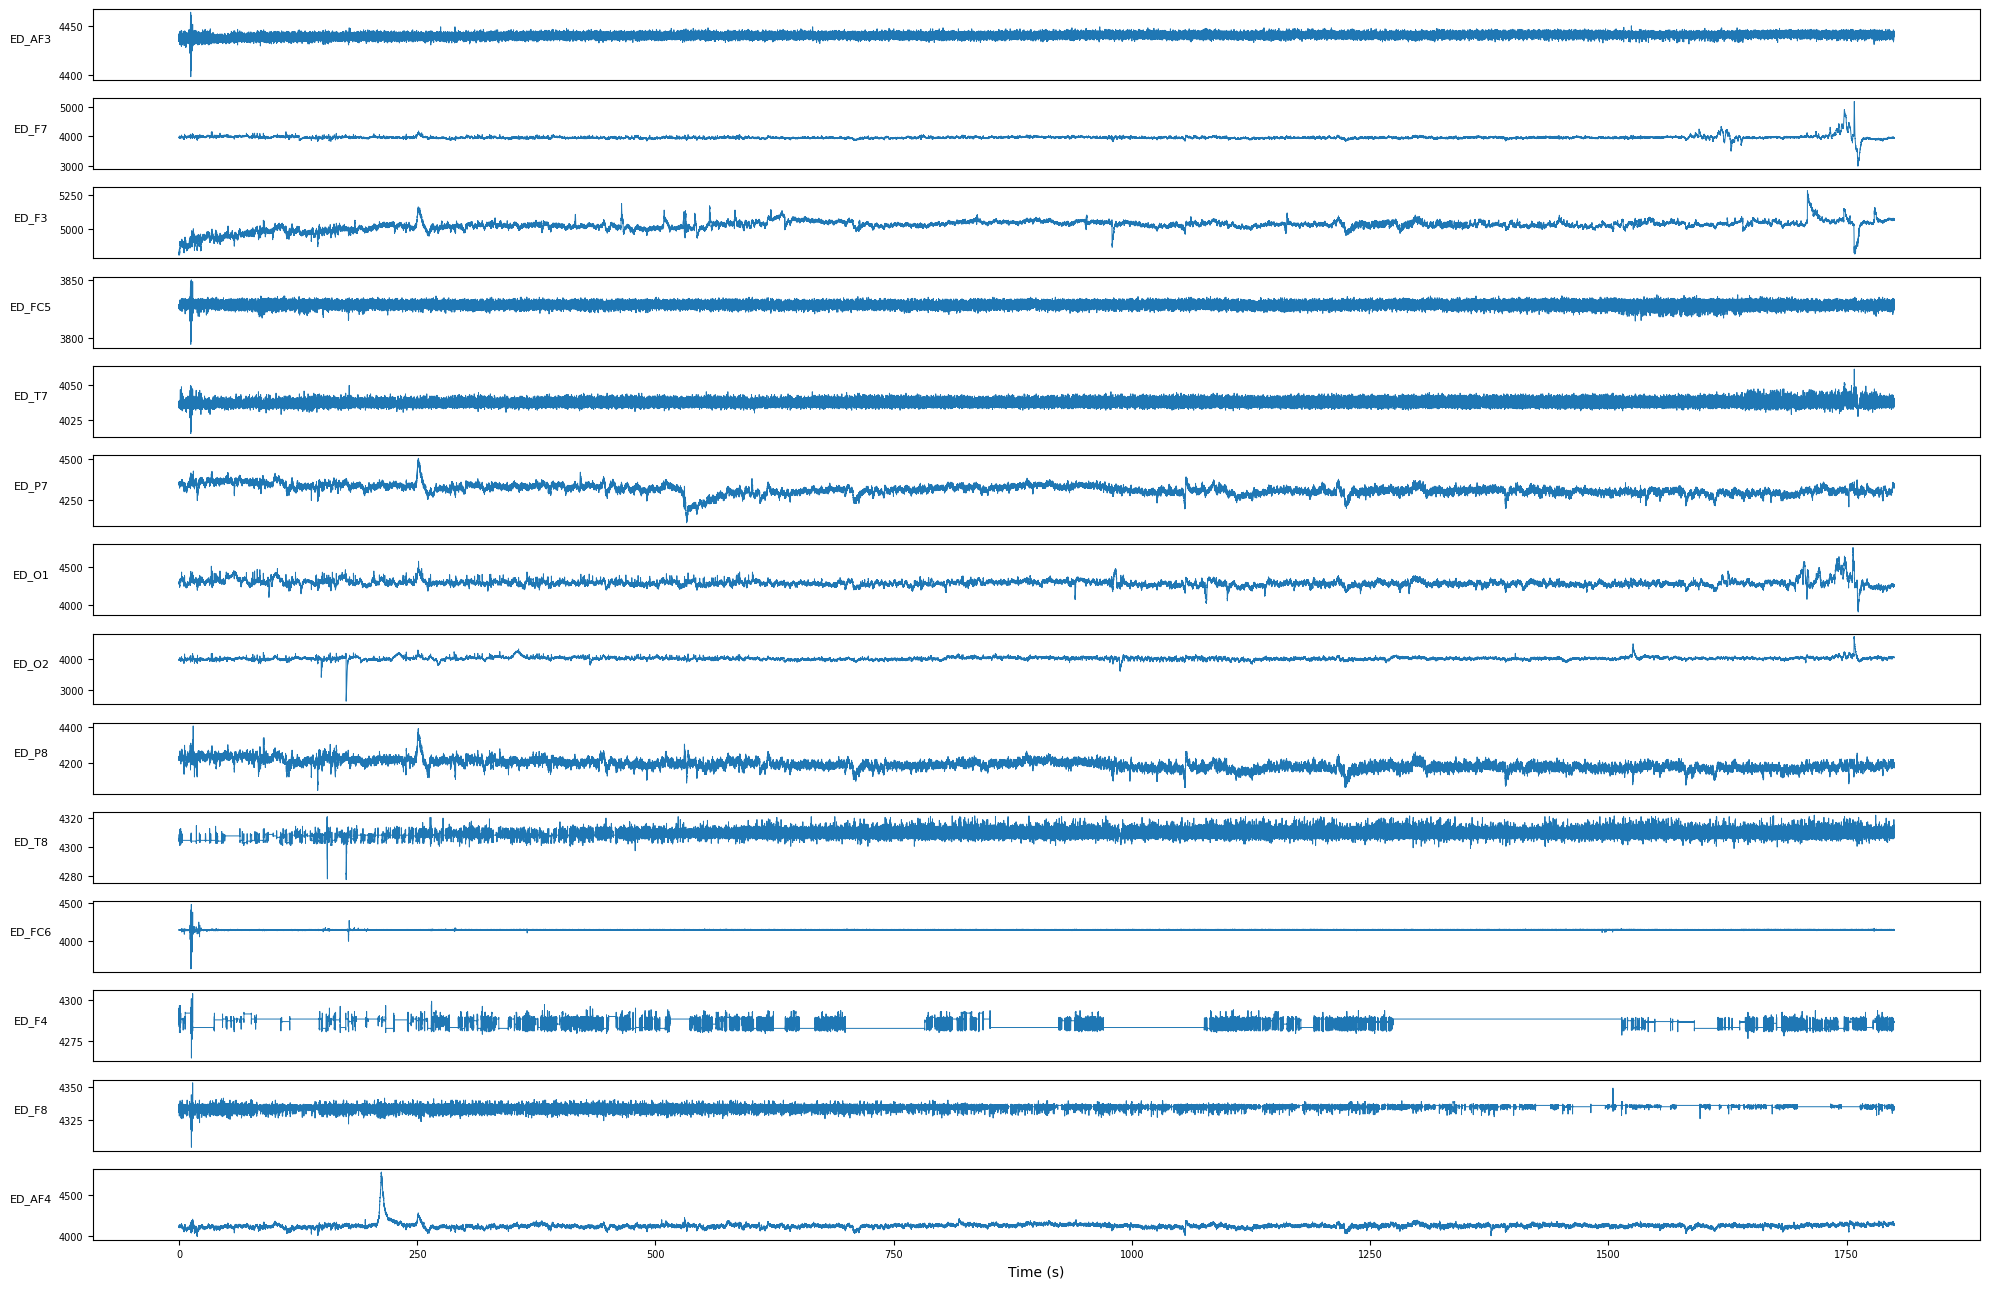

In [ ]:
# Define EEG channels
channels = ['ED_AF3', 'ED_F7', 'ED_F3', 'ED_FC5', 'ED_T7', 'ED_P7', 'ED_O1',
            'ED_O2', 'ED_P8', 'ED_T8', 'ED_FC6', 'ED_F4', 'ED_F8', 'ED_AF4']

# Create a time axis (sampling frequency is 128Hz)
eeg_data = dfs_eeg['05']
sampling_frequency = 128  # Hz
time = np.arange(len(eeg_data)) / sampling_frequency  # Time in seconds

# Plot EEG data
plt.figure(figsize=(20, 13))
for i, channel in enumerate(channels):
    plt.subplot(len(channels), 1, i + 1)
    plt.plot(time, eeg_data[channel], linewidth=0.7)
    plt.ylabel(channel, rotation=0, labelpad=20, fontsize=8)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    if i < len(channels) - 1:
        plt.xticks([])  # Hide time labels for the upper channels
    else:
        plt.xlabel("Time (s)", fontsize=10)

plt.tight_layout()
plt.show()


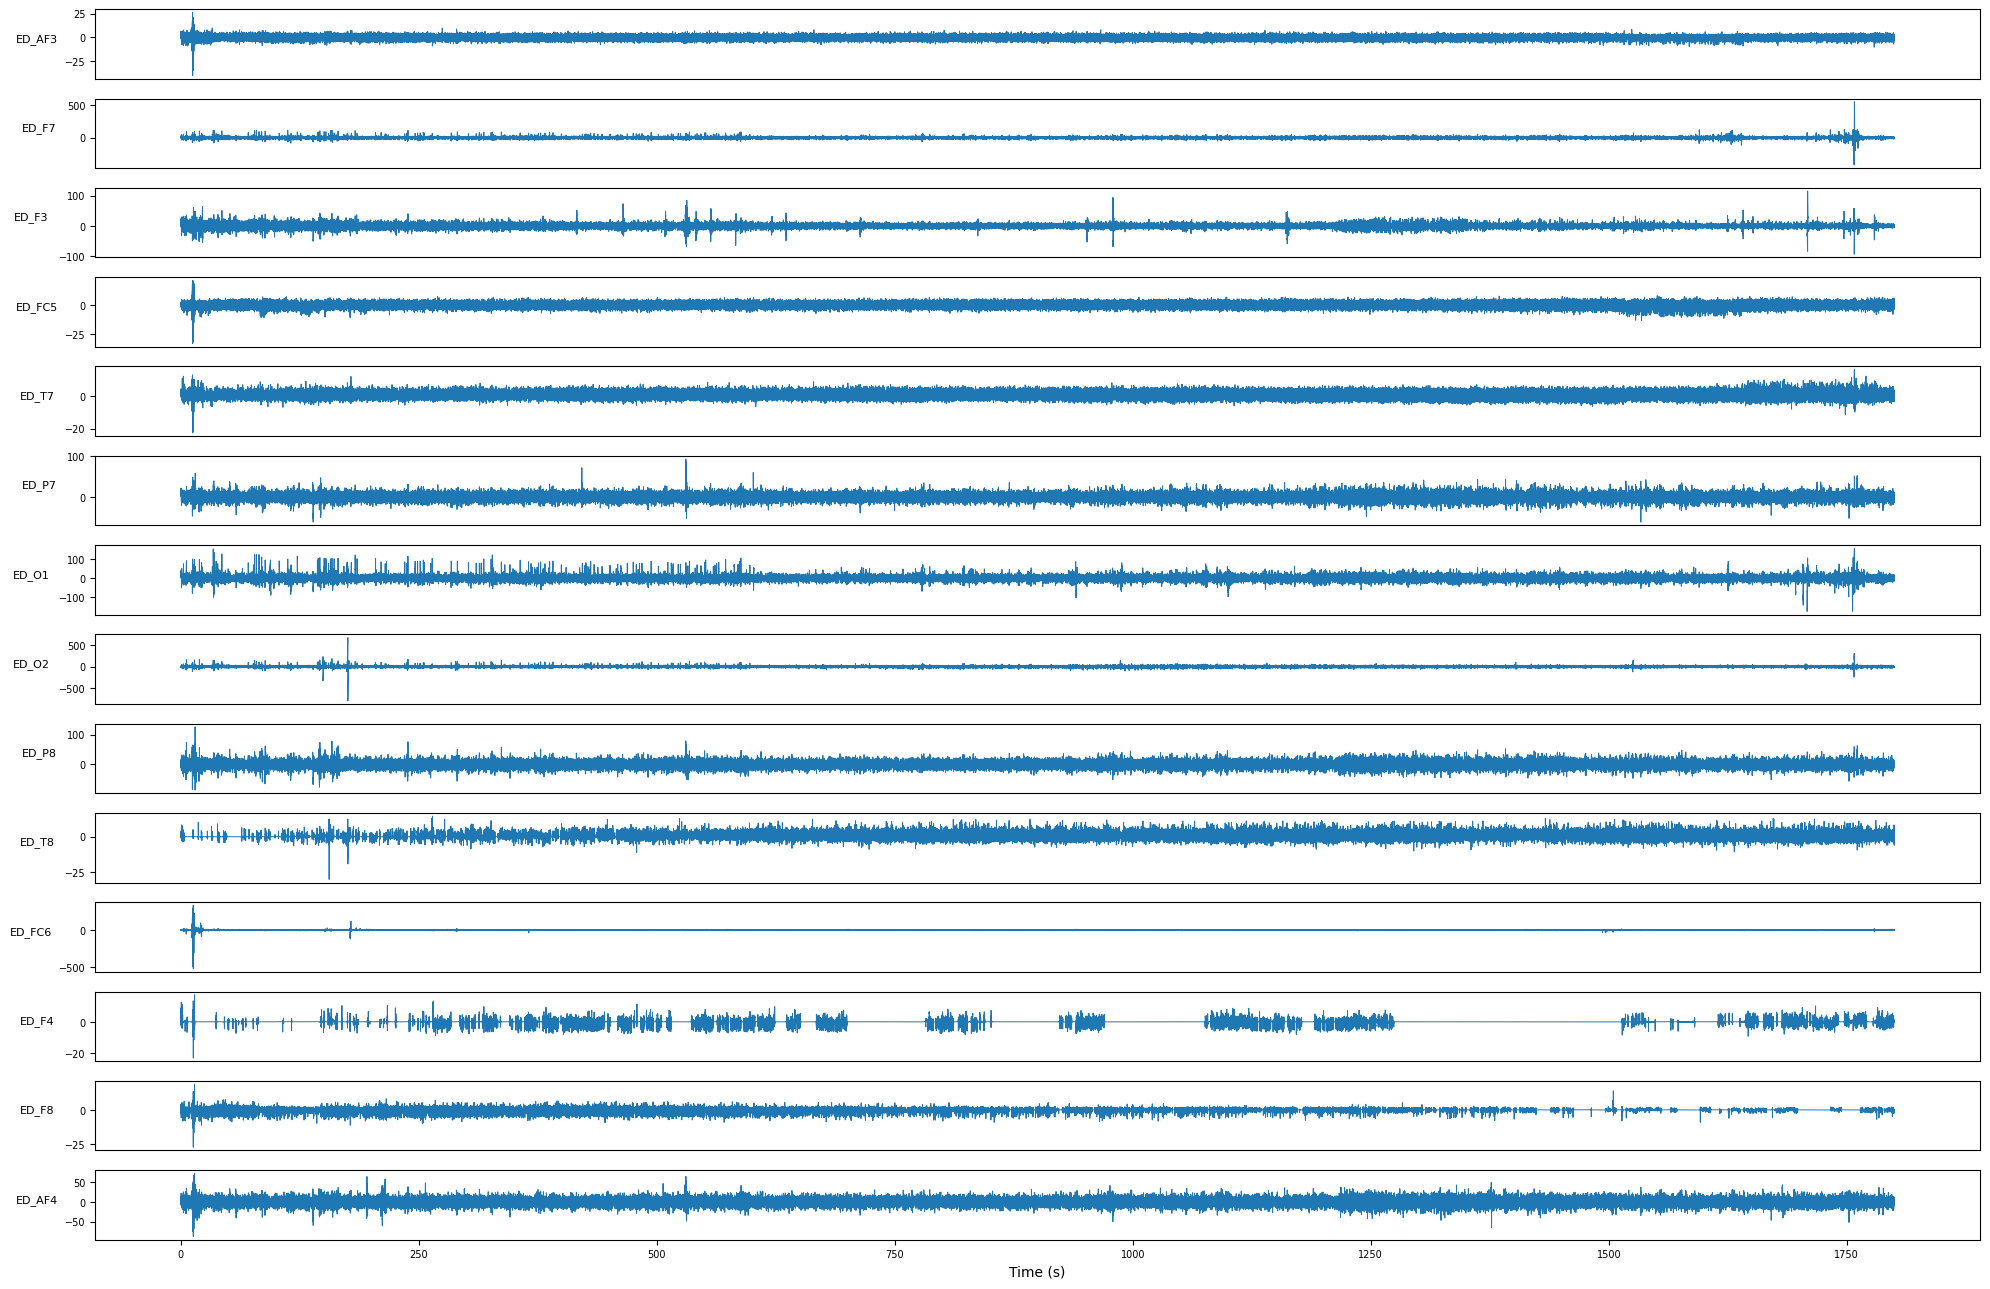

In [ ]:
# Definr EEG channels
channels = ['ED_AF3', 'ED_F7', 'ED_F3', 'ED_FC5', 'ED_T7', 'ED_P7', 'ED_O1',
            'ED_O2', 'ED_P8', 'ED_T8', 'ED_FC6', 'ED_F4', 'ED_F8', 'ED_AF4']

# Create time axis
eeg_data = dfs_eeg_filtered['05']
sampling_frequency = 128  # Hz
time = np.arange(len(eeg_data)) / sampling_frequency  # Time in seconds

# Plot EEG data
plt.figure(figsize=(20, 13))
for i, channel in enumerate(channels):
    plt.subplot(len(channels), 1, i + 1)
    plt.plot(time, eeg_data[channel], linewidth=0.7)
    plt.ylabel(channel, rotation=0, labelpad=20, fontsize=8)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    if i < len(channels) - 1:
        plt.xticks([])
    else:
        plt.xlabel("Time (s)", fontsize=10)

plt.tight_layout()
plt.show()


We apply the `bandpass_filter` and `ICA` for file 05 for demo.

From the graph, the independent components (ICs) identified by ICA are displayed with different backgrounds. The components highlighted with a pink background indicate potential artifacts detected during the ICA process.

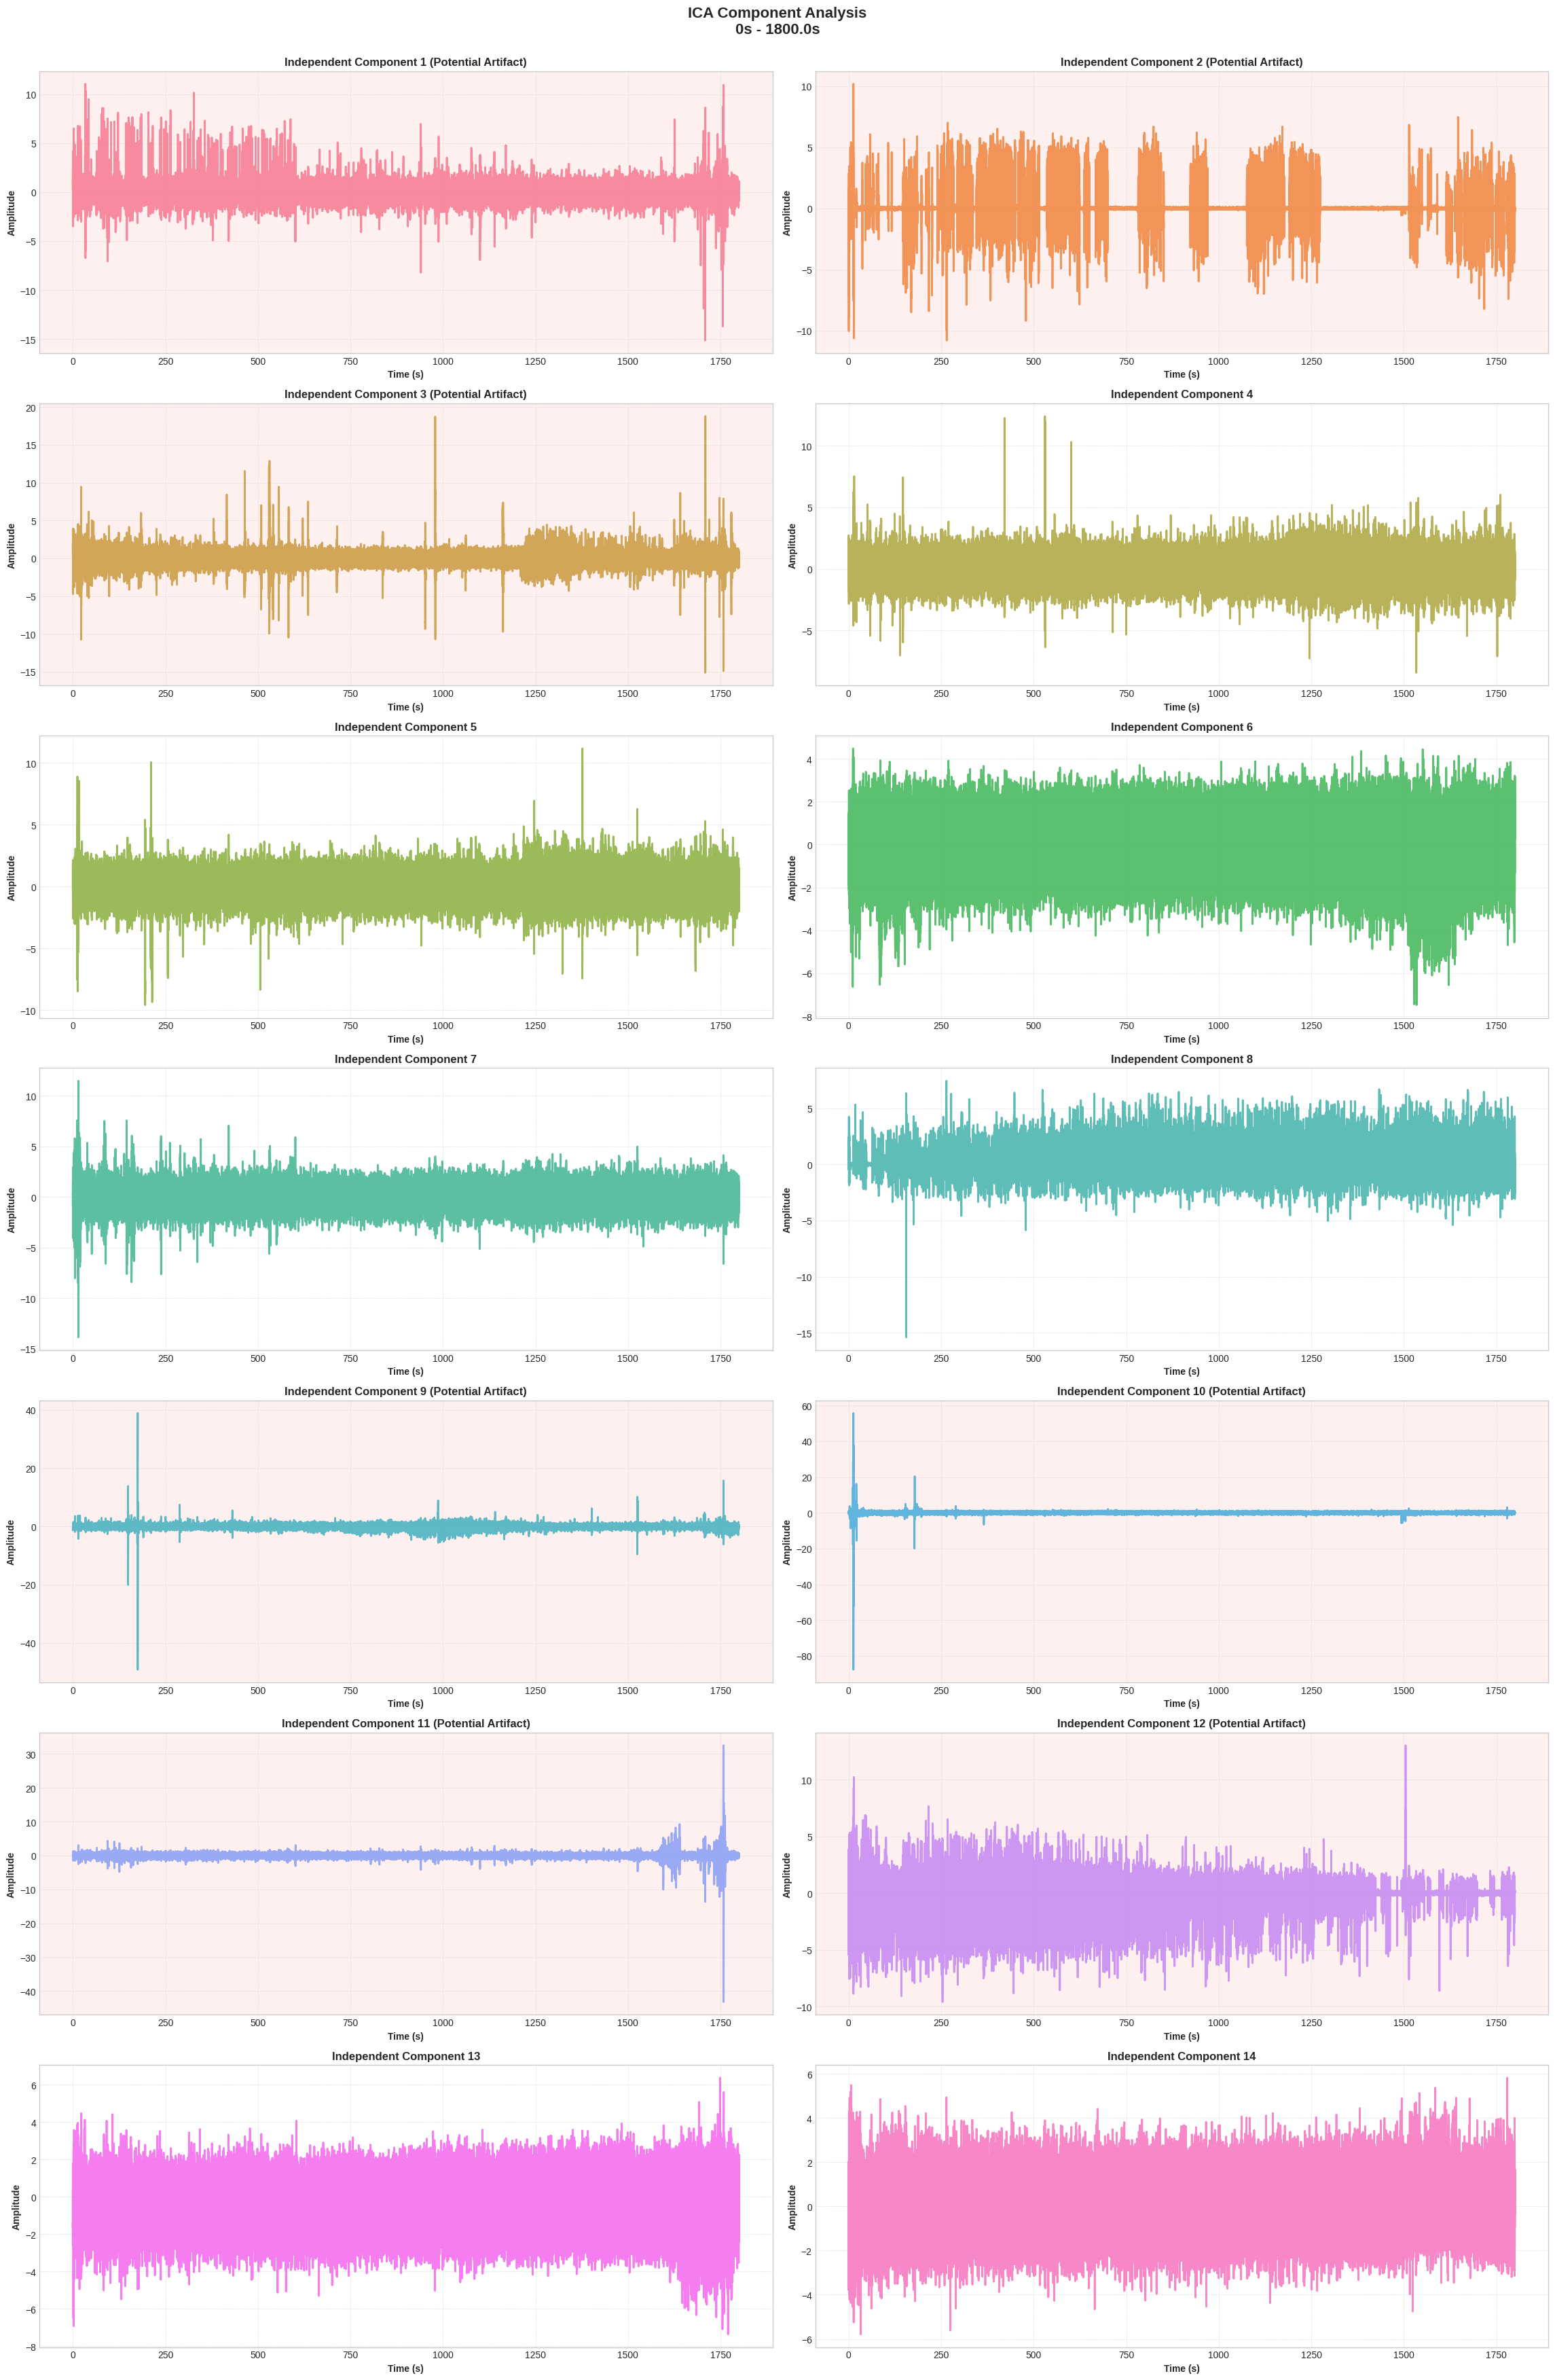

In [ ]:
# ICA for EEG data in trial 05 (filtered)
df_eeg_05_ica = process_ica(dfs_eeg_filtered['05'])

The graph below represents the EEG signals from 14 channels over 30 minutes across 24 trials after **bandpass filtering** and applying **ICA**.
 - The signals appear cleaner, with reduced high-frequency noise and baseline drifts. Peaks and patterns in the signals are more pronounced, suggesting a better representation of underlying brain activity.
 - Many of the non-neural artifacts have been significantly reduced or eliminated. The signals are now primarily reflective of neural activity.
 - The cleaned signals exhibit a more uniform structure across trials and channels

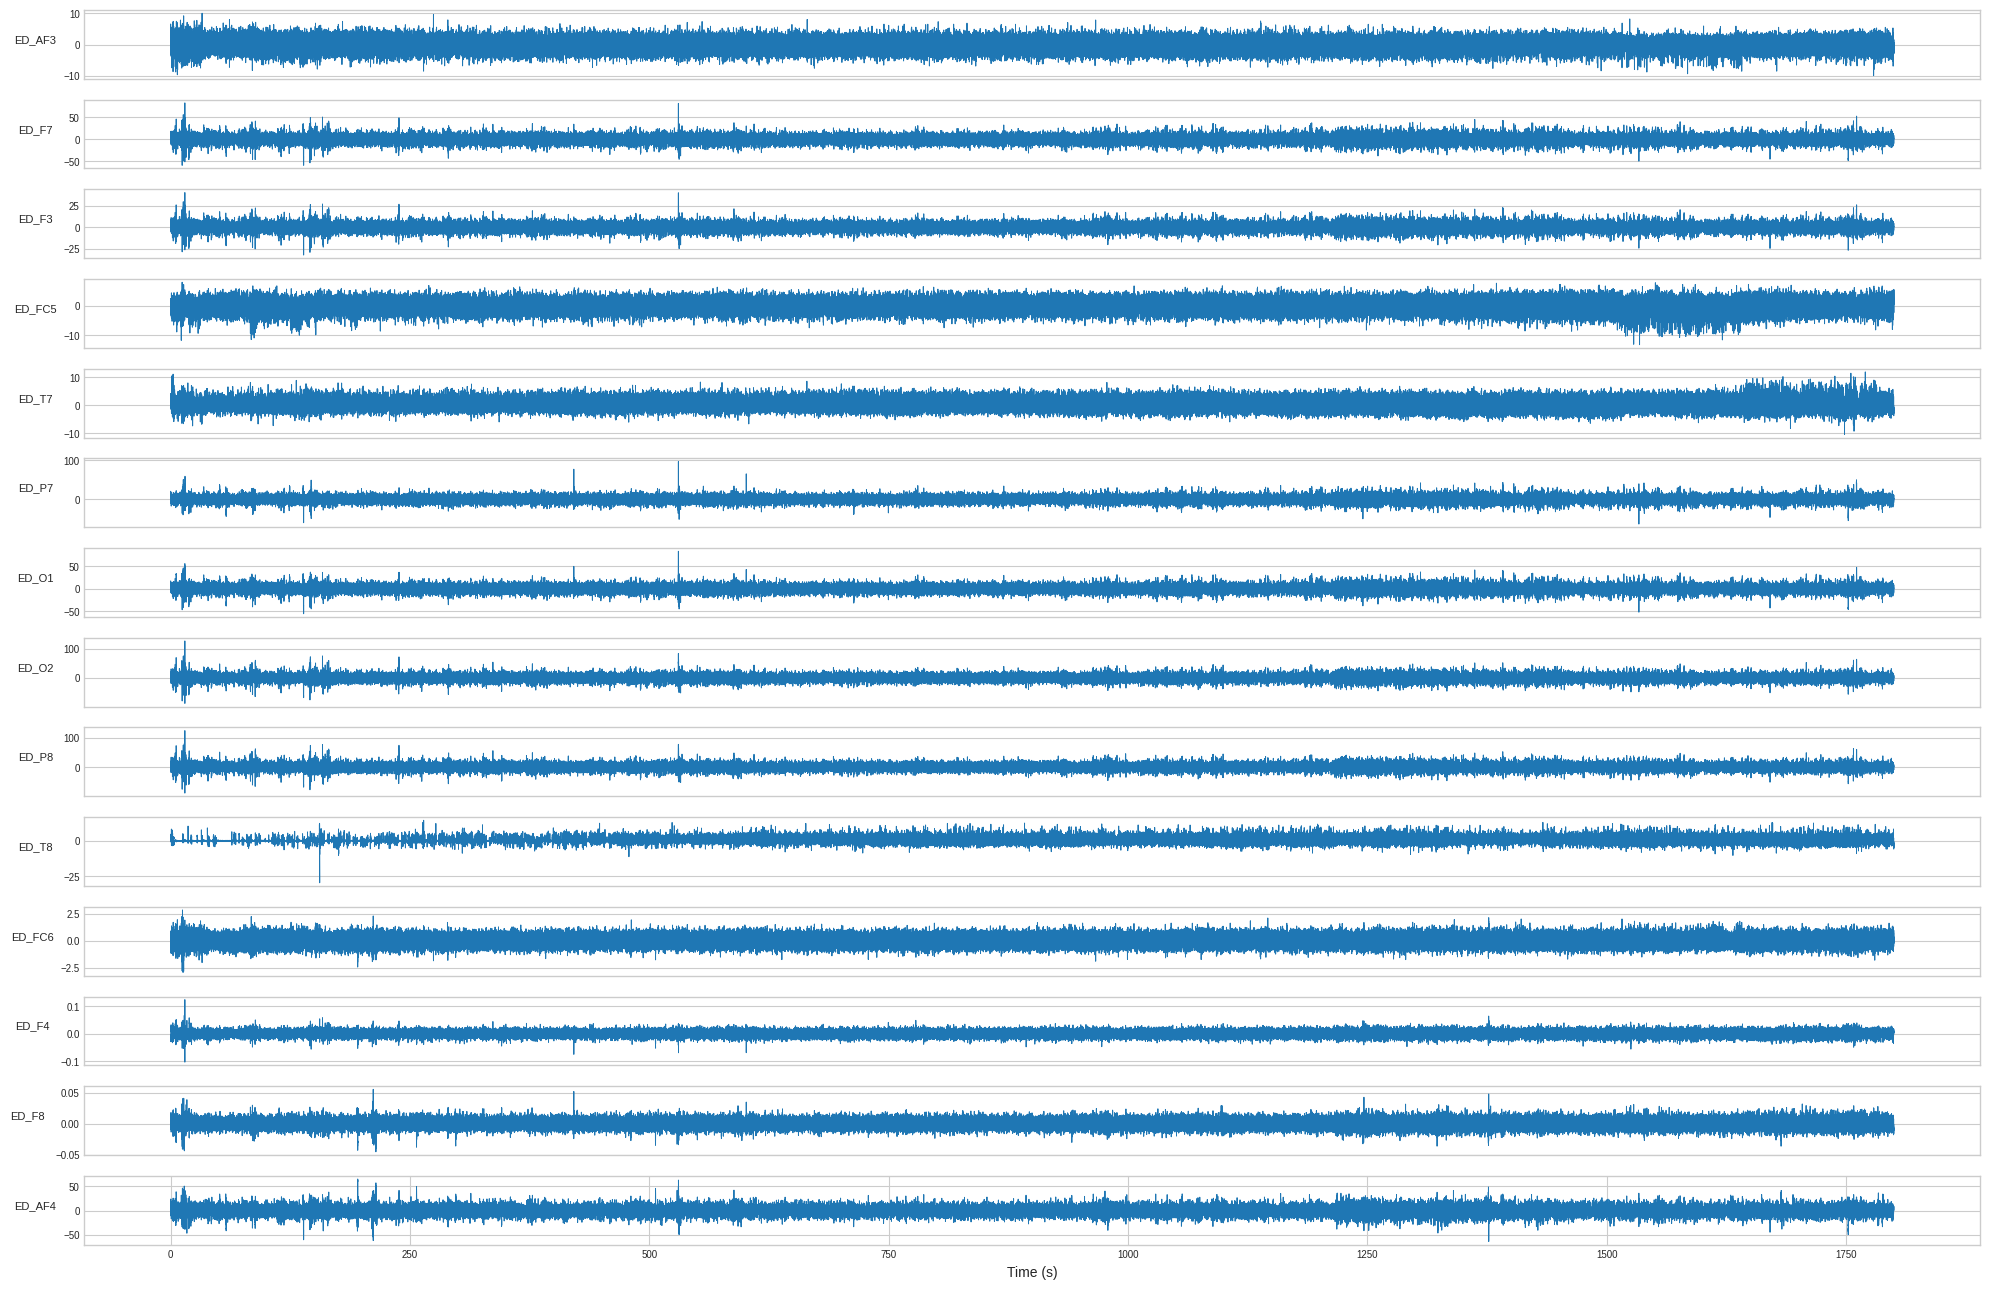

In [ ]:
# Create time axis
sampling_frequency = 128  # Hz
time = np.arange(len(df_eeg_05_ica['cleaned_data'])) / sampling_frequency  # Time in seconds

# Plot EEG data
plt.figure(figsize=(20, 13))
for i, channel in enumerate(important_channels):
    plt.subplot(len(important_channels), 1, i + 1)
    plt.plot(time, df_eeg_05_ica['cleaned_data'][channel], linewidth=0.7)
    plt.ylabel(channel, rotation=0, labelpad=20, fontsize=8)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    if i < len(important_channels) - 1:
        plt.xticks([])
    else:
        plt.xlabel("Time (s)", fontsize=10)

plt.tight_layout()
plt.show()


Below is the EEG signal graph of `experiment 05` over a 30-minute duration, encompassing three mental states, analyzed using FFT (Fast Fourier Transform) and Welch's Method with dual axes, where:

- FFT: Displays the power spectrum, representing the signal's energy distribution across frequencies.
- Welch's Method: Provides a smoothed PSD, offering a robust estimate of frequency content by averaging overlapping segments.



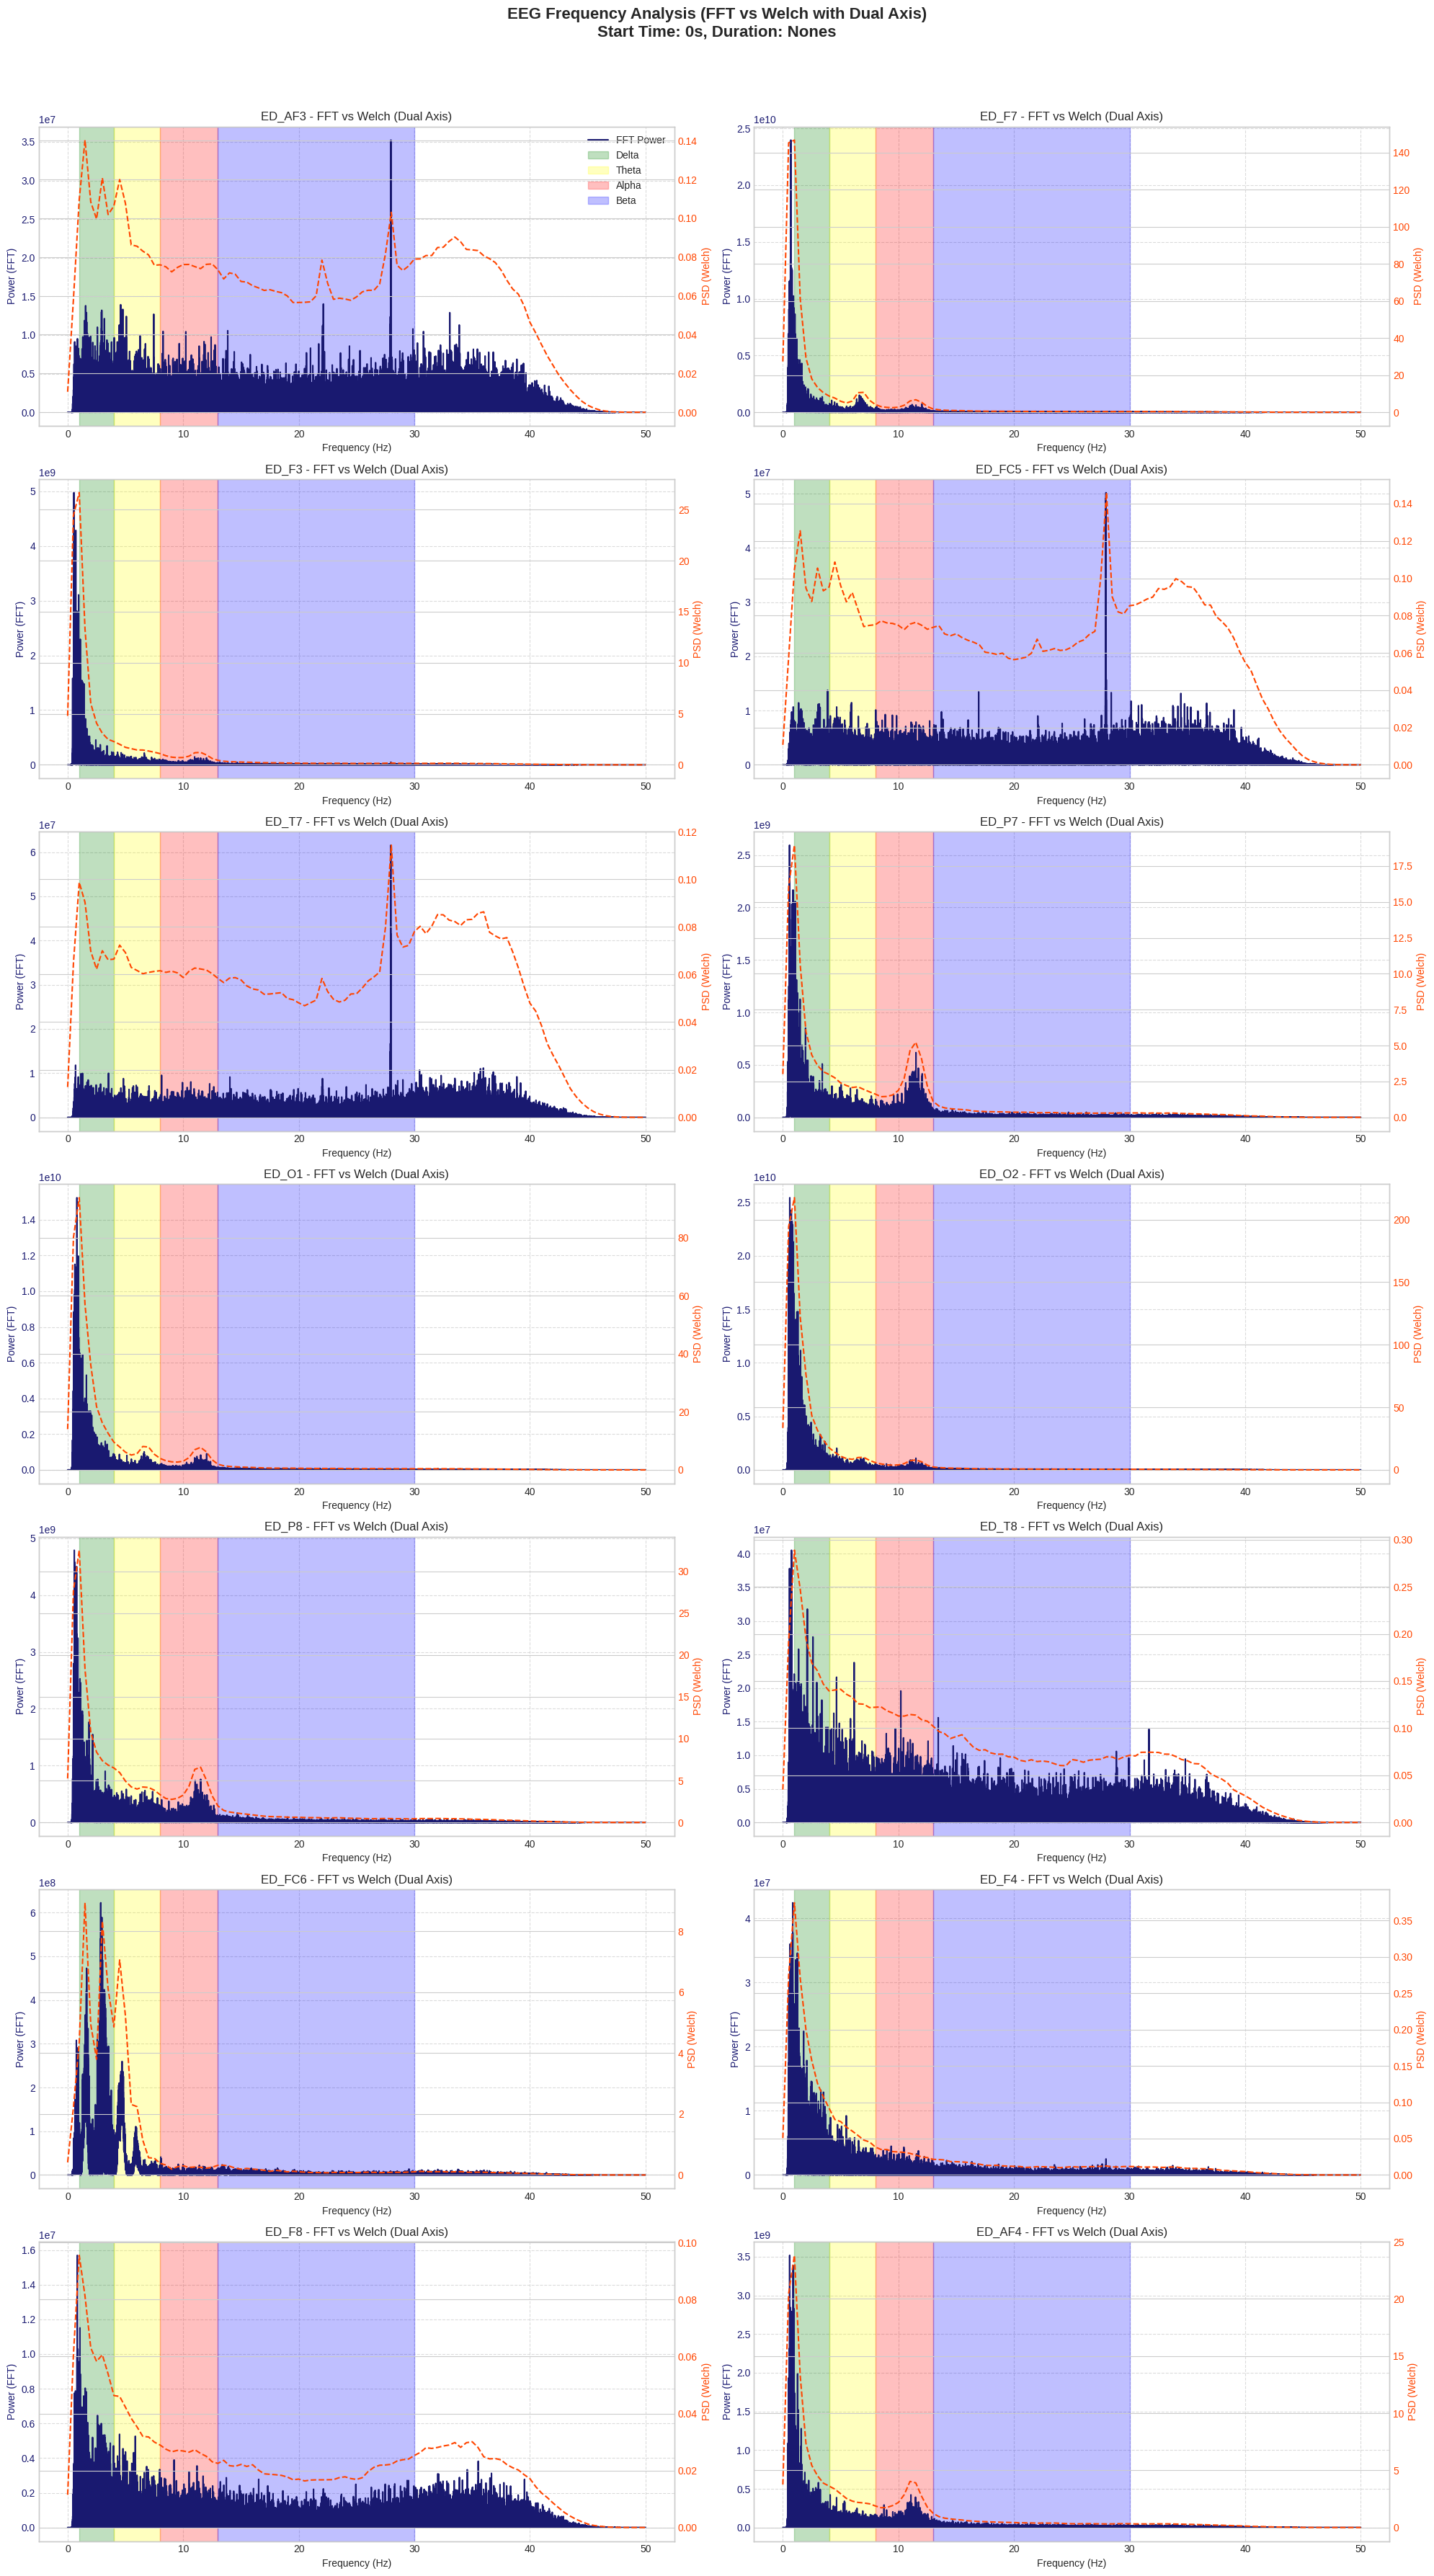

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

def plot_eeg_fft_and_welch_dual_axis(
    eeg_data,
    channels=None,
    start_time=0,
    duration=None,
    sampling_rate=128,
    freq_range=(0, 50)
):
    # Default to all channels if not specified
    if channels is None:
        channels = eeg_data.columns.tolist()

    # Calculate start and end indices
    start_index = int(start_time * sampling_rate)
    if duration is None:
        end_index = len(eeg_data)
    else:
        end_index = int((start_time + duration) * sampling_rate)

    # Determine plot layout
    n_channels = len(channels)
    n_rows = (n_channels + 1) // 2

    plt.figure(figsize=(20, 5 * n_rows))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    for i, channel_name in enumerate(channels, 1):
        plt.subplot(n_rows, 2, i)

        # Extract channel data for specified time segment
        channel_data = eeg_data[channel_name].values[start_index:end_index]

        # FFT-based power spectrum
        n = len(channel_data)
        freqs_fft = np.fft.rfftfreq(n, d=1 / sampling_rate)
        fft_values = np.fft.rfft(channel_data)
        power_fft = np.abs(fft_values) ** 2

        # Welch's method
        freqs_welch, psd_welch = welch(channel_data, fs=sampling_rate, nperseg=256)

        # Filter frequency range
        mask_fft = (freqs_fft >= freq_range[0]) & (freqs_fft <= freq_range[1])
        mask_welch = (freqs_welch >= freq_range[0]) & (freqs_welch <= freq_range[1])

        # Create dual-axis chart
        ax1 = plt.gca()  # Primary y-axis (Welch)
        ax2 = ax1.twinx()  # Secondary y-axis (FFT)

        # Plot FFT on the right y-axis
        ax1.plot(freqs_fft[mask_fft], power_fft[mask_fft], label='FFT Power', color='midnightblue')
        ax1.set_ylabel('Power (FFT)', color='midnightblue')
        ax1.tick_params(axis='y', labelcolor='midnightblue')


        # Plot Welch on the left y-axis
        ax2.plot(freqs_welch[mask_welch], psd_welch[mask_welch], label='Welch PSD', color='orangered', linestyle='--')
        ax2.set_ylabel('PSD (Welch)', color='orangered')
        ax2.tick_params(axis='y', labelcolor='orangered')

        # Annotate frequency bands on primary axis
        ax1.axvspan(1, 4, color='green', alpha=0.25, label='Delta' if i == 1 else None)
        ax1.axvspan(4, 8, color='yellow', alpha=0.25, label='Theta' if i == 1 else None)
        ax1.axvspan(8, 13, color='red', alpha=0.25, label='Alpha' if i == 1 else None)
        ax1.axvspan(13, 30, color='blue', alpha=0.25, label='Beta' if i == 1 else None)

        # Titles and grids
        ax1.set_title(f'{channel_name} - FFT vs Welch (Dual Axis)')
        ax1.set_xlabel('Frequency (Hz)')
        ax1.grid(True, linestyle='--', alpha=0.7)

        # Legend for primary axis
        if i == 1:  # Avoid repetitive legends for bands
            ax1.legend(loc='upper right')

    plt.suptitle(f'EEG Frequency Analysis (FFT vs Welch with Dual Axis)\nStart Time: {start_time}s, Duration: {duration}s',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


plot_eeg_fft_and_welch_dual_axis(
    eeg_data=dfs_eeg_filtered['05'],  # Replace with your EEG DataFrame
    channels=None,          # List of EEG channels
    start_time=0,                    # Start time in seconds
    duration=None,                     # Duration in seconds
    sampling_rate=128,                # Sampling rate
    freq_range=(0, 50)                # Frequency range of interest
)


Below is the brainwave energy graph after ICA and filtering, corresponding to each mental state: focused, unfocused, and drowsy in `experiment 05`.

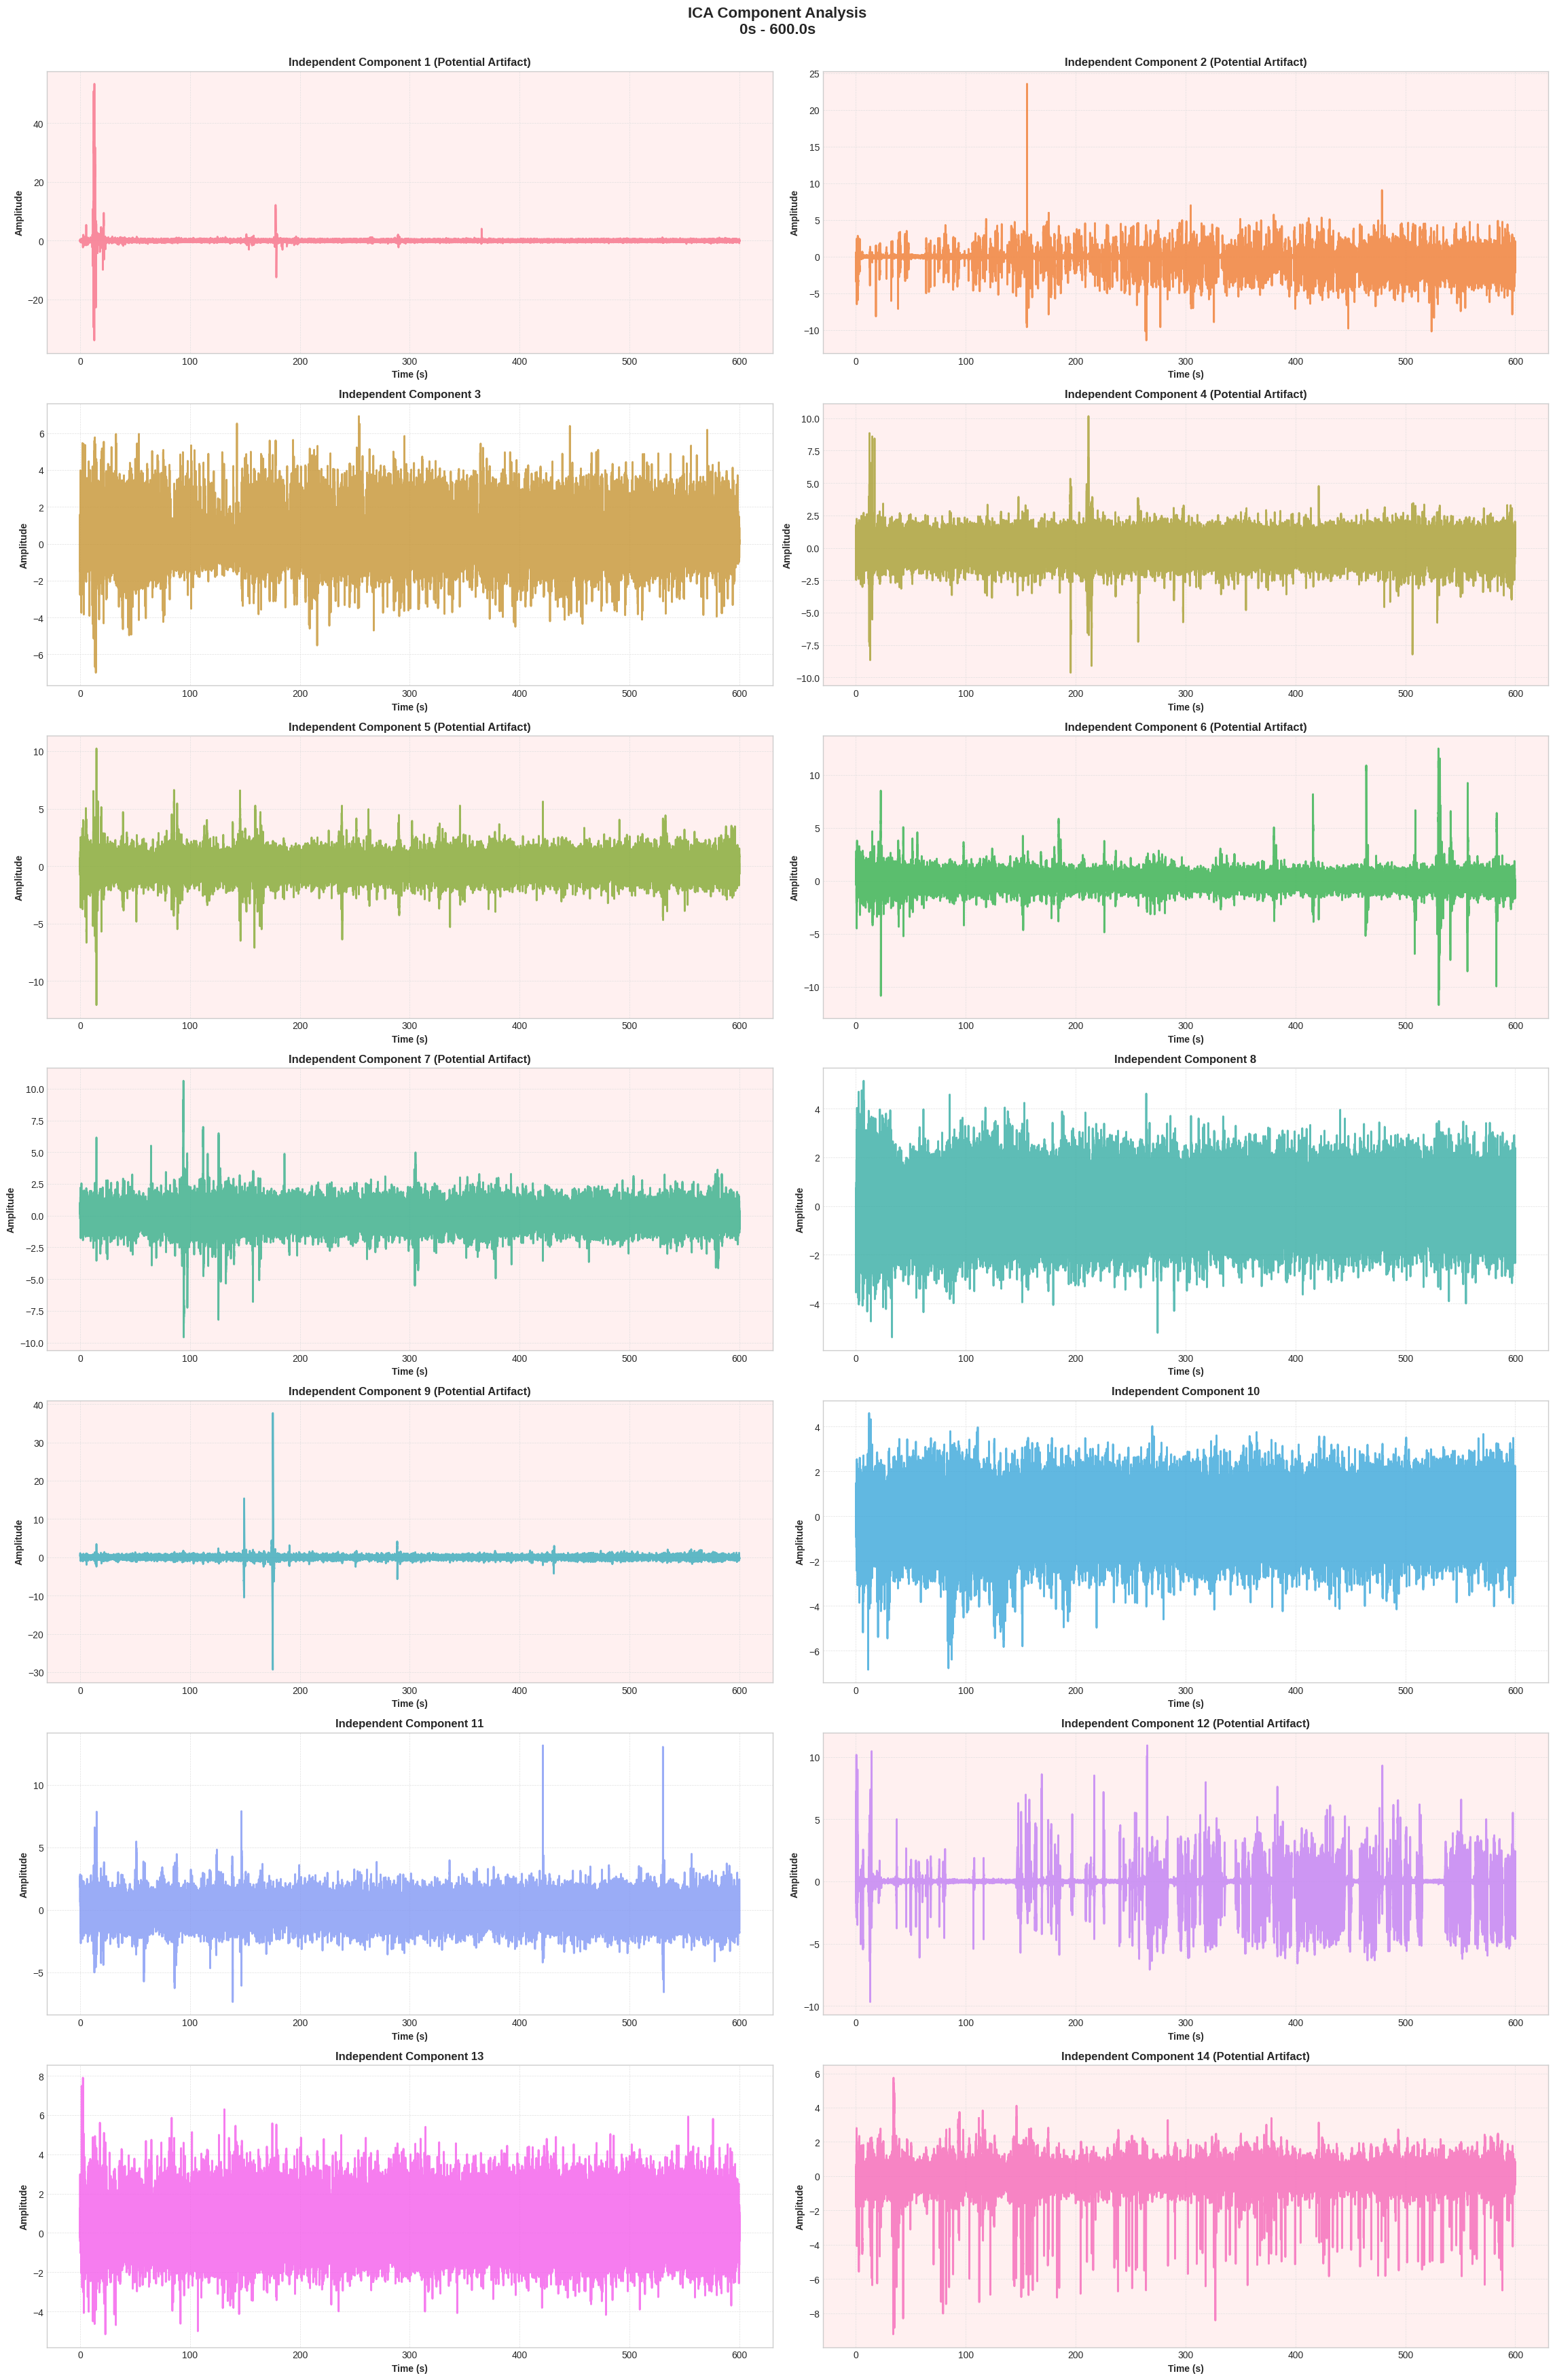

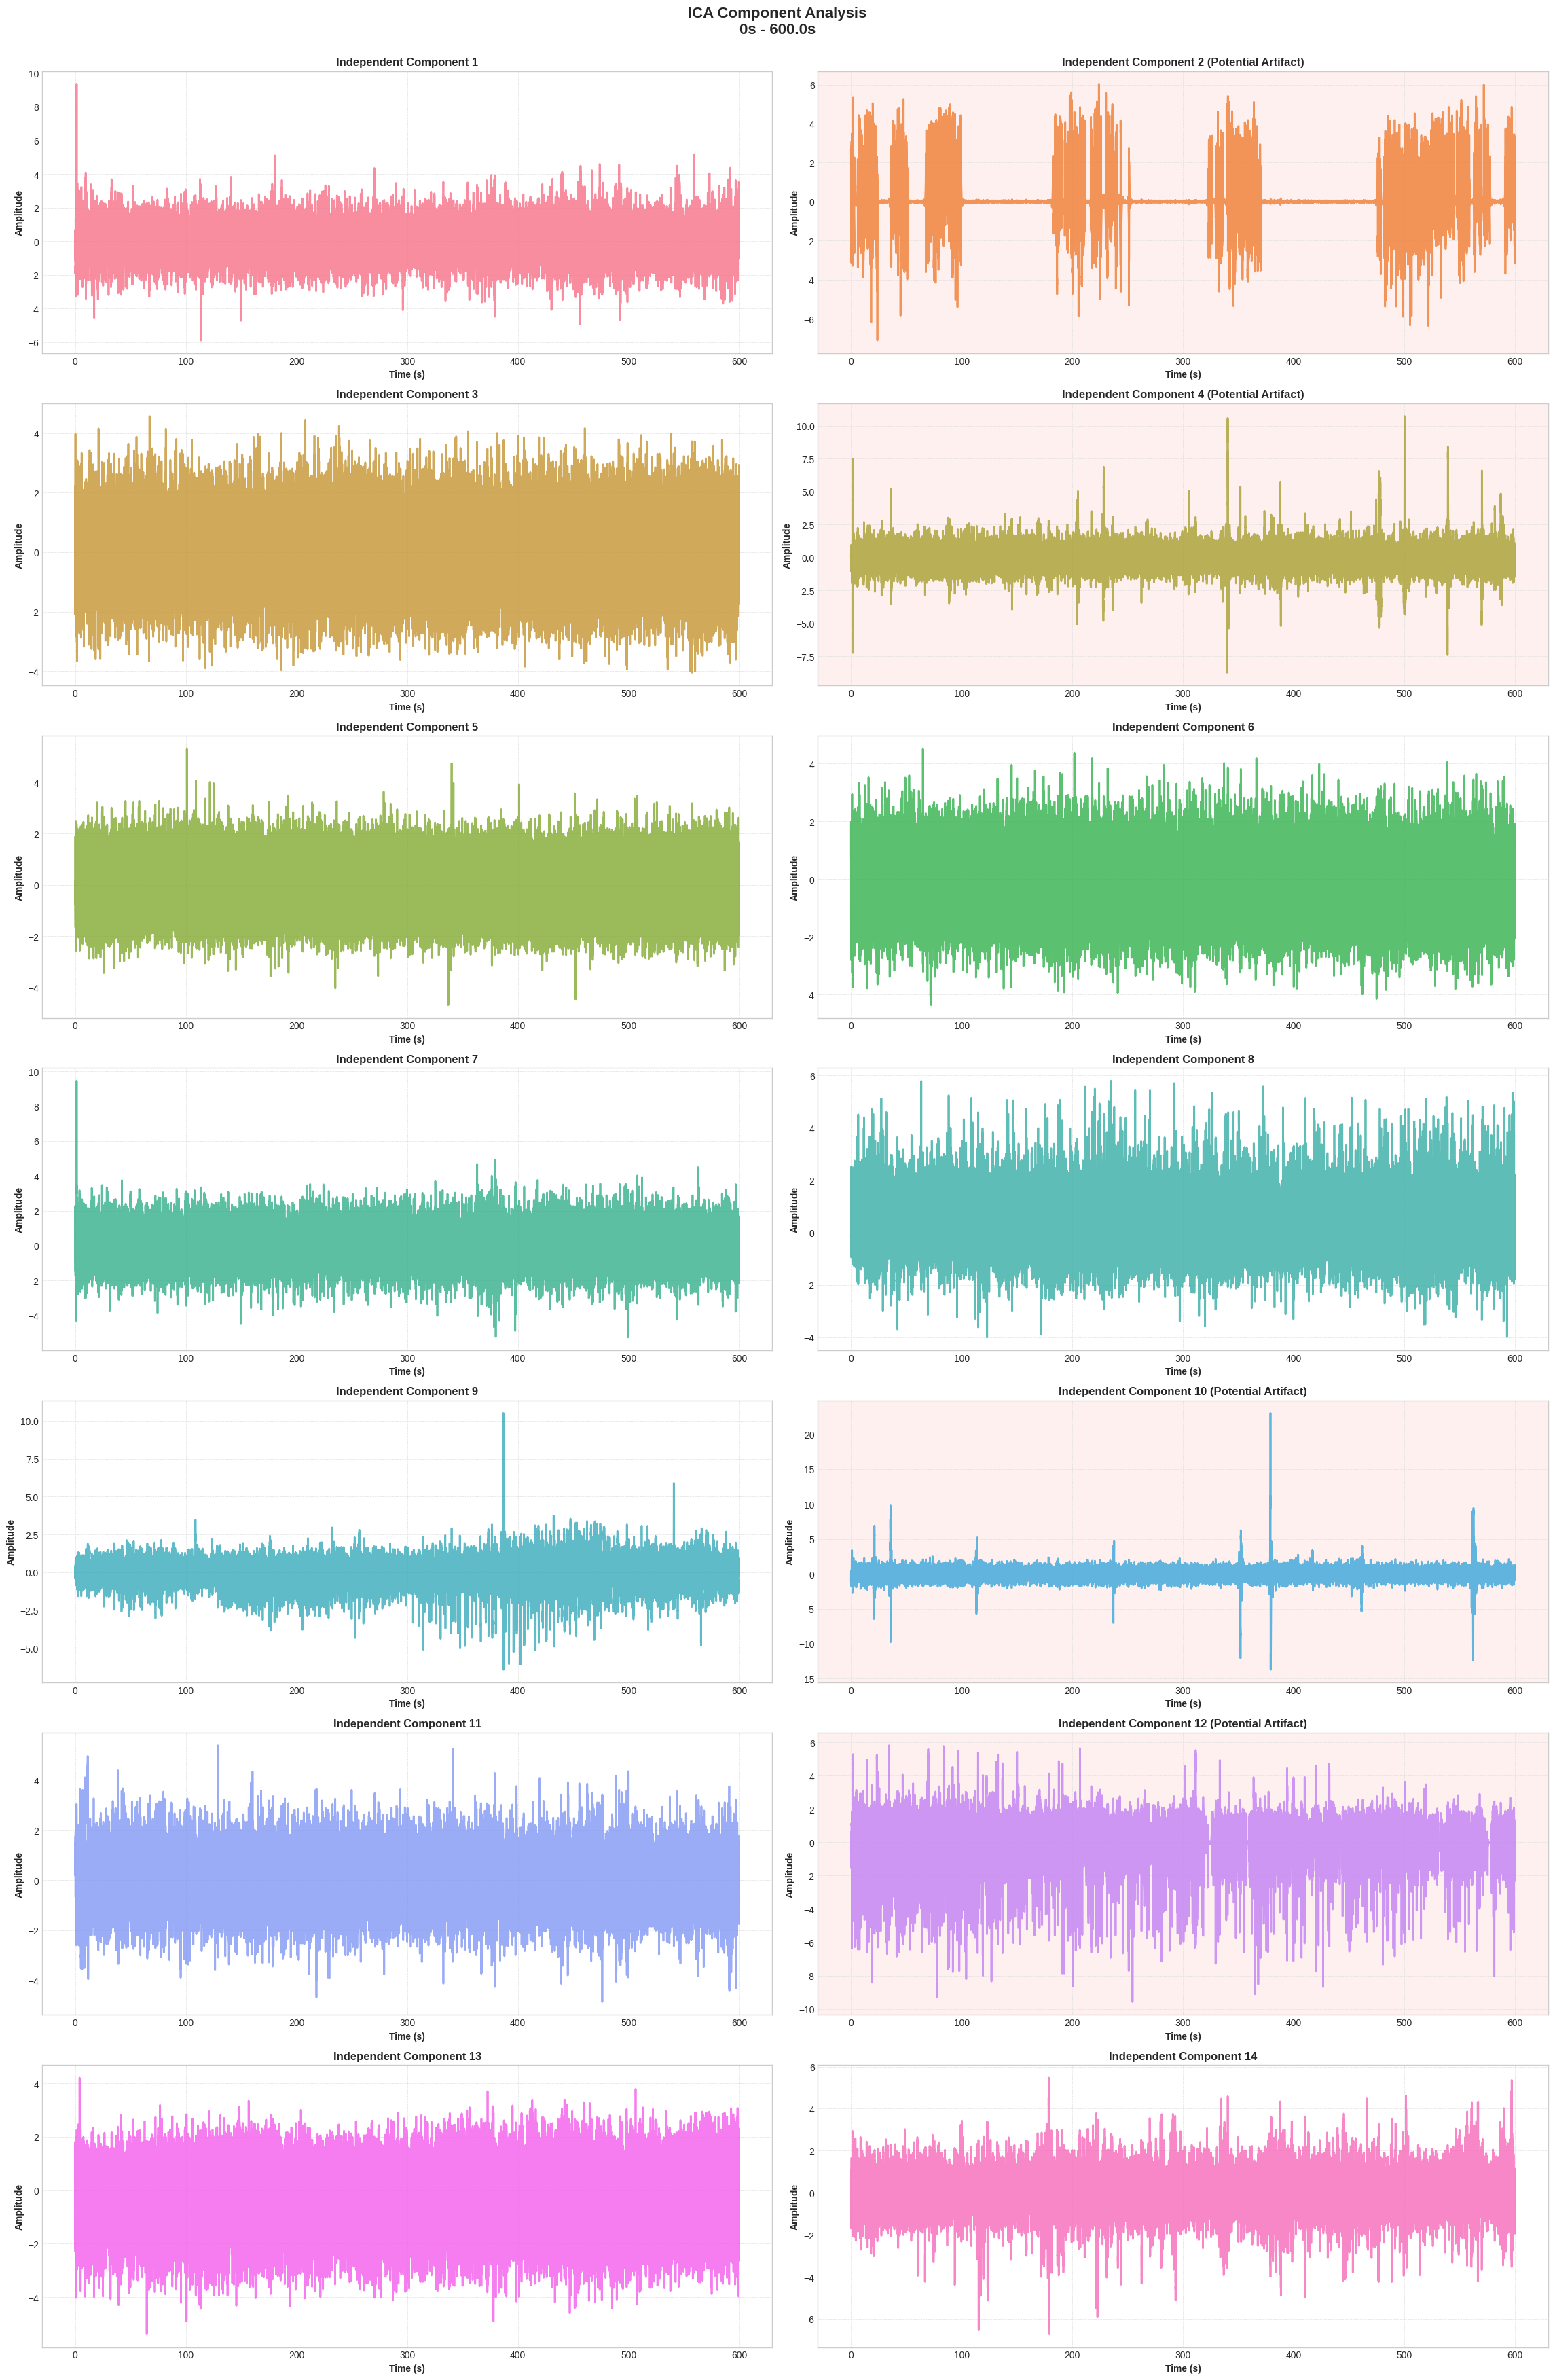

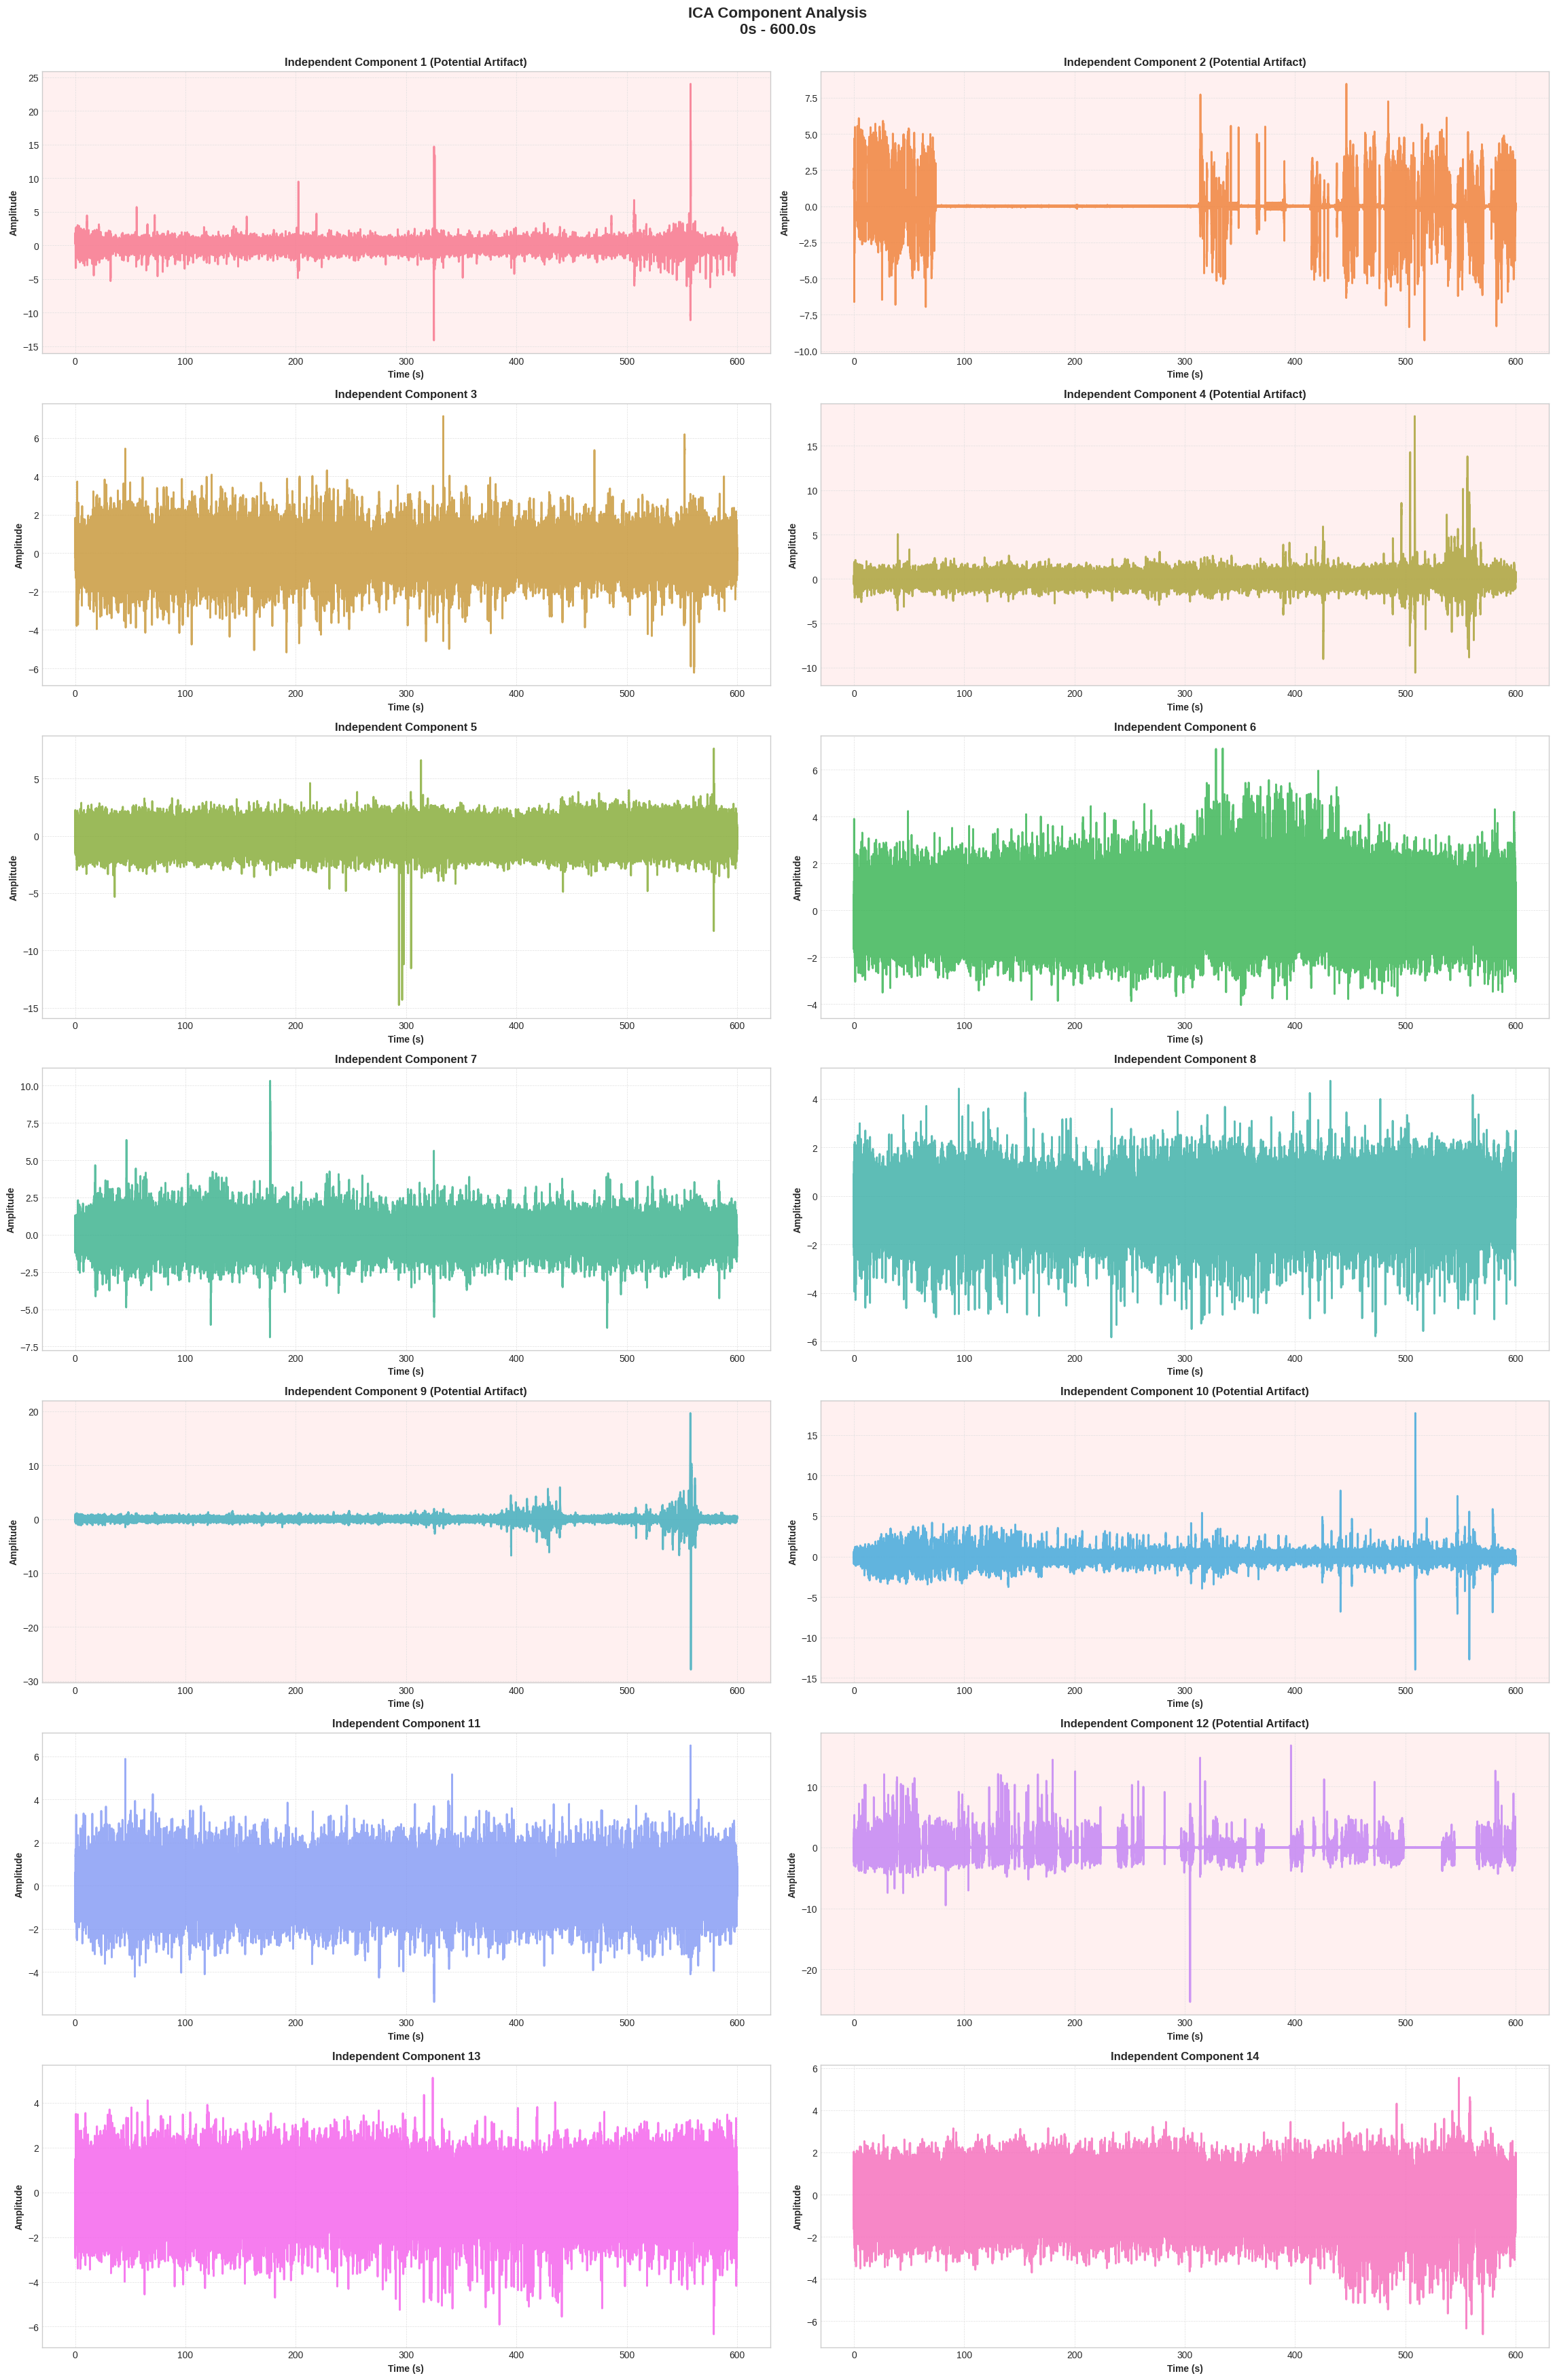

In [ ]:
results_focus = process_ica(dfs_eeg_filtered['05'][:10*128*60])               # Focused STATE
results_unfocus = process_ica(dfs_eeg_filtered['05'][10*128*60:20*128*60])    # Unfocused STATE
results_drowsy = process_ica(dfs_eeg_filtered['05'][20*128*60:])              # Drowsy STATE

This is below the graph in the frequency domain of the two channels F3 and F7 in each state.

EEG Frequenct Analysis


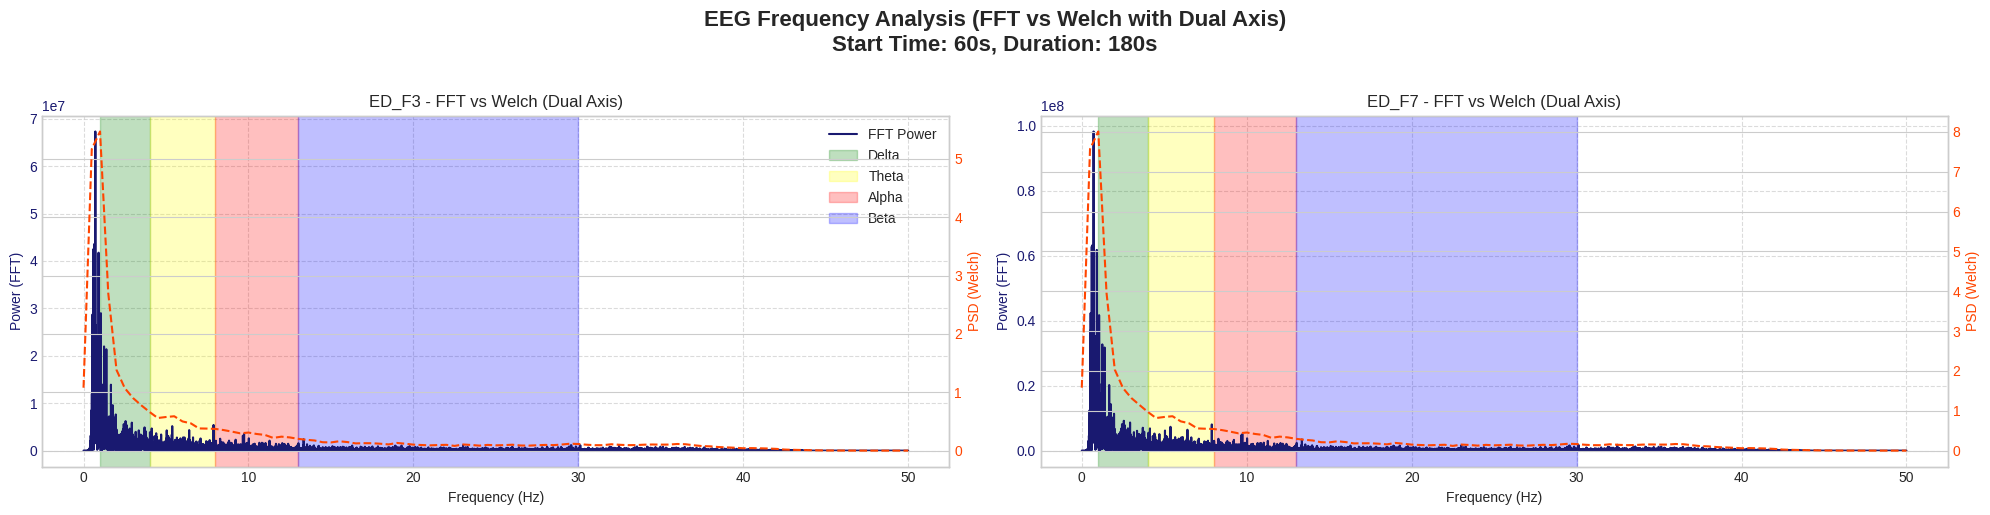

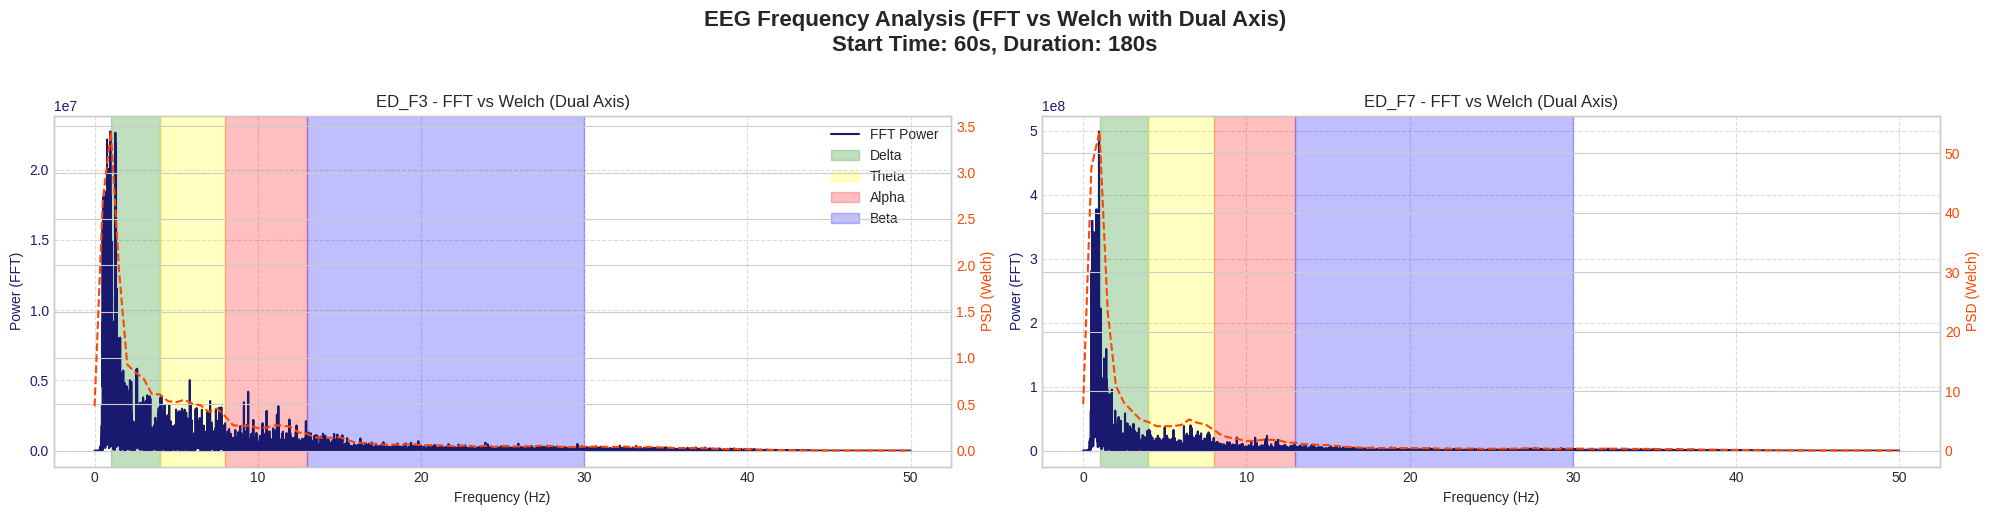

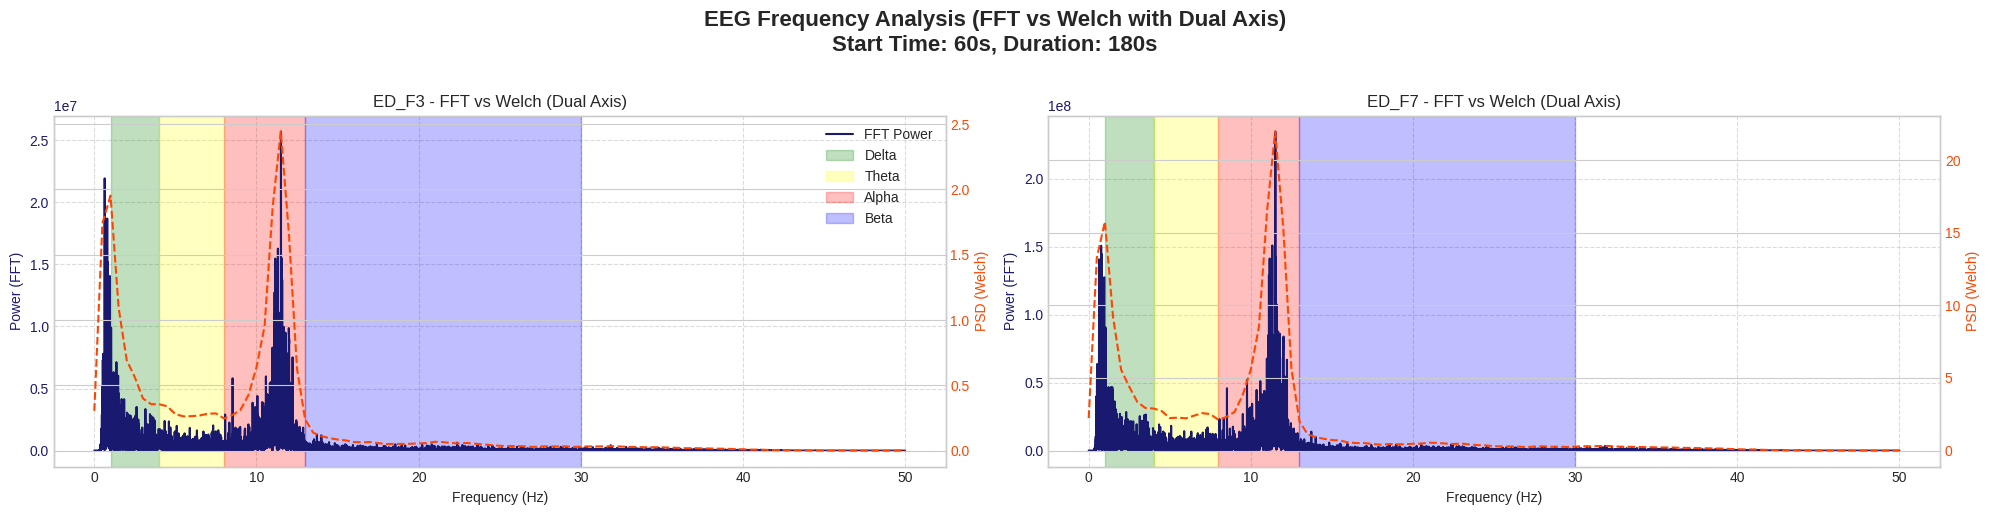

In [ ]:
print("EEG Frequenct Analysis")
plot_eeg_fft_and_welch_dual_axis(results_focus['cleaned_data'], ['ED_F3', 'ED_F7'], 60, 180)
plot_eeg_fft_and_welch_dual_axis(results_unfocus['cleaned_data'], ['ED_F3', 'ED_F7'], 60, 180)
plot_eeg_fft_and_welch_dual_axis(results_drowsy['cleaned_data'], ['ED_F3', 'ED_F7'], 60, 180)

**Observed details across all channels:**
- `Focused State`: In this state, we observed higher power in the beta frequency band (13-30 Hz), which is commonly associated with active concentration and alertness. The FFT show sharp, distinct peaks within this range.
- `Unfocused State`: The power in the alpha (8-13 Hz) and theta (4-8 Hz) bands are likely to dominate here. These frequencies are linked to relaxed or unfocused mental states. The graphs display broader peaks in these ranges, suggesting more variability or less focus in the brain activity.
- `Drowsy State`: For drowsiness, we saw higher power in the theta band, sometimes extending into the delta band (0.5-4 Hz). The graphs show more continuous, lower-frequency activity, indicating a transition toward sleep or deep relaxation.

**ICA application**

In [ ]:
# process a segment of EEG data using ICA
def process_ica_segment(df_eeg, start, end):
    return process_ica(df_eeg[start:end])


# Function to process EEG data for a specific file (identified by `idx`)
def process_file(idx, df_eeg):
    # Process the first 10 minutes (focus state)
    result_focus = process_ica_segment(df_eeg, 0, 10*128*60)
    # Process the next 10 minutes (unfocused state)
    result_unfocus = process_ica_segment(df_eeg, 10*128*60, 20*128*60)
    # Process the remaining data (drowsy state)
    result_drowsy = process_ica_segment(df_eeg, 20*128*60, len(df_eeg))
    # Concatenate the cleaned data from all segments and return
    return pd.concat([result_focus["cleaned_data"], result_unfocus["cleaned_data"], result_drowsy["cleaned_data"]])

dfs_eeg_ica = {}
# Use parallel processing to process EEG data from multiple files
results = Parallel(n_jobs=-1)(delayed(process_file)(idx, df_eeg) for idx, df_eeg in tqdm(enumerate(dfs_eeg_filtered.values()), total=len(dfs_eeg_filtered)))

for idx, result in enumerate(results):
    dfs_eeg_ica[f'{file_indices[idx]:02d}'] = result


<a name="sectionIV"></a>
##<b>IV. Feature Engineering</b>

The function extract_advanced_features is designed to extract advanced features from EEG data in a sliding window manner, with a focus on both spectral and temporal characteristics.

In [ ]:
def extract_advanced_features(data, fs=128, epoch_length=128, overlap=64, nperseg=128):
    """
    Extract advanced EEG features with improved numerical stability.
    """
    features = []
    total_samples = len(data)

    # Loop over the data in sliding windows with overlap
    for start in range(0, total_samples - epoch_length + 1, epoch_length - overlap):
        end = start + epoch_length

        # Extract the signal for each epoch
        epoch_data = data.iloc[start:end]
        epoch_features = []

        # Compute features for each channel
        for channel in epoch_data.columns:
            signal = epoch_data[channel].values

            # Compute PSD using Welch's method
            freqs, psd = welch(signal, fs=fs, nperseg=nperseg)

            # Add small epsilon to prevent division by zero
            psd_sum = np.sum(psd)
            psd_safe = psd + 1e-10  # Small constant to prevent division by zero

            # Frequency band powers
            delta_power = np.sum(psd_safe[(freqs >= 1) & (freqs <= 4)])
            theta_power = np.sum(psd_safe[(freqs >= 4) & (freqs <= 8)])
            alpha_power = np.sum(psd_safe[(freqs >= 8) & (freqs <= 12)])
            beta_power = np.sum(psd_safe[(freqs >= 13) & (freqs <= 30)])

            # Intensity Weighted Mean Frequency (IWMF)
            # Use psd_sum to check if power exists
            iwmf = np.sum(freqs * psd) / psd_sum if psd_sum > 0 else 0

            # Intensity Weighted Bandwidth (IWBW)
            iwbw = np.sqrt(np.sum(((freqs - iwmf) ** 2) * psd) / psd_sum) if psd_sum > 0 else 0

            # Spectral Edge Frequency (SEF, 95%)
            cumulative_power = np.cumsum(psd_safe)
            total_power = cumulative_power[-1]
            sef_indices = np.where(cumulative_power >= 0.95 * total_power)[0]
            sef = freqs[sef_indices[0]] if len(sef_indices) > 0 else 0

            # Temporal features
            variance = np.var(signal)
            energy = np.sum(signal ** 2)

            # Entropy with numerical stability
            signal_abs = np.abs(signal) + 1e-10
            entropy = -np.sum(np.log2(signal_abs) * signal_abs)

            # Collect features
            epoch_features.extend([
                delta_power, theta_power, alpha_power, beta_power,
                iwmf, iwbw, sef, variance, energy, entropy
            ])

        # Append epoch features
        features.append(epoch_features)

    # Define feature names
    feature_columns = []
    for channel in data.columns:
        feature_columns.extend([
            f'{channel}_delta', f'{channel}_theta', f'{channel}_alpha', f'{channel}_beta',
            f'{channel}_iwmf', f'{channel}_iwbw', f'{channel}_sef',
            f'{channel}_variance', f'{channel}_energy', f'{channel}_entropy'
        ])

    # Convert features to DataFrame
    feature_df = pd.DataFrame(features, columns=feature_columns)
    return feature_df

In [ ]:
# Label segments of EEG data with different states based on the time intervals.
for df_eeg in dfs_eeg_ica.values():
    df_eeg["STATE"] = -1
    df_eeg.iloc[:10*60*128, -1] = 0
    df_eeg.iloc[10*60*128:20*60*128, -1] = 1
    df_eeg.iloc[20*60*128:, -1] = 2

The below function extract advanced EEG features from different time segments of EEG data, **in parallel**, and label them with different states (focus, unfocused, drowsy).

In [ ]:
def extract_features_parallel(idx, df_eeg):
    df_eeg_copy = df_eeg.copy()

    # Define time segments
    df_eeg_copy_focus = df_eeg_copy[:10*128*60]
    df_eeg_copy_unfocus = df_eeg_copy[10*128*60:20*128*60]
    df_eeg_copy_drowsy = df_eeg_copy[20*128*60:]

    # Extract features for each segment
    features_focus = extract_advanced_features(df_eeg_copy_focus.drop(columns=['STATE']))
    features_unfocus = extract_advanced_features(df_eeg_copy_unfocus.drop(columns=['STATE']))
    features_drowsy = extract_advanced_features(df_eeg_copy_drowsy.drop(columns=['STATE']))

    # Add state labels to each segment's features
    features_focus['STATE'] = 0
    features_unfocus['STATE'] = 1
    features_drowsy['STATE'] = 2

    # Concatenate the features
    features = pd.concat([features_focus, features_unfocus, features_drowsy], ignore_index=True)

    return f'{file_indices[idx]:02d}', features


results = Parallel(n_jobs=-1)(
    delayed(extract_features_parallel)(idx, df_eeg)
    for idx, df_eeg in tqdm(enumerate(dfs_eeg_ica.values()), total=len(dfs_eeg_ica))
)

# Collecting results into a dictionary
dfs_eeg_features = {key: value for key, value in results}

100%|██████████| 24/24 [10:54<00:00, 27.25s/it]


In [ ]:
df_eeg_final = pd.concat([dfs_eeg_features[f'{file_indices[idx]:02d}'] for idx in range(len(dfs_eeg_features))])
df_eeg_final.shape

(86080, 141)

In [ ]:
df_eeg_final

ED_AF3_delta  ED_AF3_theta  ED_AF3_alpha  ED_AF3_beta  ED_AF3_iwmf  \
0         0.000157      0.000017      0.000002     0.000005     3.231004   
1         0.000115      0.000077      0.000009     0.000013     4.600663   
2         0.000146      0.000015      0.000003     0.000006     3.225971   
3         0.000035      0.000017      0.000002     0.000003     5.244783   
4         0.000075      0.000008      0.000003     0.000004     3.086613   
...            ...           ...           ...          ...          ...   
3592      0.000505      0.000219      0.000420     0.001075    17.358120   
3593      0.001118      0.000338      0.000736     0.001375    17.334343   
3594      0.000343      0.000220      0.000407     0.000820    19.992156   
3595      0.000549      0.000203      0.001181     0.001231    17.103771   
3596      0.000229      0.000504      0.000500     0.000870    18.372090   

      ED_AF3_iwbw  ED_AF3_sef  ED_AF3_variance  ED_AF3_energy  ED_AF3_entropy  \
0        5.223605         8.0         0.000221       0.029461        7.848405   
1        5.601618        15.0         0.000321       0.041118        9.722879   
2        5.895737        13.0         0.000115       0.016086        6.387523   
3        6.814015        20.0         0.000049       0.007790        5.470544   
4        5.159330        13.0         0.000146       0.018749        8.091842   
...           ...         ...              ...            ...             ...   
3592    11.833642        37.0         0.003592       0.461013       23.323787   
3593    13.263442        38.0         0.003443       0.441170       23.399235   
3594    13.465941        37.0         0.003087       0.396103       23.042106   
3595    12.050540        39.0         0.002848       0.365680       22.357266   
3596    11.408171        39.0         0.003332       0.427277       23.489572   

      ...  ED_AF4_theta  ED_AF4_alpha  ED_AF4_beta  ED_AF4_iwmf  ED_AF4_iwbw  \
0     ...      1.567199      0.181538     0.525711     3.147419     5.171987   
1     ...     10.053228      1.116570     2.232945     4.619148     5.575888   
2     ...      0.905273      0.107341     0.648510     2.815159     5.428547   
3     ...      1.017631      0.164336     0.394860     6.408603     8.864584   
4     ...      0.702969      0.363928     0.453707     3.069404     5.148290   
...   ...           ...           ...          ...          ...          ...   
3592  ...     60.834201    160.147829    17.503134     9.288778     4.798253   
3593  ...     14.436959     92.028522    13.637510     9.958541     4.843900   
3594  ...     15.692999     73.130343    11.849184     9.361518     6.075743   
3595  ...     55.644586    125.636761    10.018087     8.804124     5.301720   
3596  ...     12.943261     29.303743    11.422311     9.403153     7.985568   

      ED_AF4_sef  ED_AF4_variance  ED_AF4_energy  ED_AF4_entropy  STATE  
0            8.0        25.006978    3465.193717    -1133.833870      0  
1           15.0        37.281510    4772.259753    -1674.585839      0  
2           13.0        12.159556    1814.410041     -767.321371      0  
3           28.0         4.942911     806.068940     -360.048766      0  
4           15.0        16.095489    2063.084677     -860.366780      0  
...          ...              ...            ...             ...    ...  
3592        18.0       255.290130   32680.175293    -6580.840466      2  
3593        15.0       149.187472   19105.895950    -4514.140656      2  
3594        19.0       136.945877   17537.865919    -4356.643488      2  
3595        15.0       156.333826   20093.802830    -4923.630234      2  
3596        27.0       121.316957   15804.141982    -4026.503088      2  

[86080 rows x 141 columns]

<a name="sectionV"></a>
##<b>V. Model Development</b>

In [ ]:
# Prepare data for modeling
X = df_eeg_final.drop(columns=['STATE'])
y = df_eeg_final['STATE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


**AUC nad ROC Curve Explanation**

1. **Accuracy:**
   The accuracy of the model is the ratio of correct predictions to the total number of predictions. The formula for accuracy is:
   $$
   \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
   $$

2. **Precision:**
   Precision is calculated using the formula:
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$
   Where:
   - \( TP \) (True Positives): The number of true positive predictions.
   - \( FP \) (False Positives): The number of false positive predictions.

3. **Recall:**
   Recall is calculated using the formula:
   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$
   Where:
   - \( FN \) (False Negatives): The number of false negative predictions.

4. **F1-Score:**
   The F1-score is the harmonic mean between precision and recall, calculated using the formula:
   $$
   F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

5. **Confusion Matrix:**
   The confusion matrix is a performance evaluation table that shows the number of correct and incorrect predictions for each class. The confusion matrix formula is:
   $$
   \begin{bmatrix}
   TP & FP \\
   FN & TN
   \end{bmatrix}
   $$
   Where:
   - \( TP \) (True Positives): The number of true positive predictions.
   - \( FP \) (False Positives): The number of false positive predictions.
   - \( FN \) (False Negatives): The number of false negative predictions.
   - \( TN \) (True Negatives): The number of true negative predictions.

**AUC and ROC Curve (Receiver Operating Characteristic):**

   The AUC (Area Under the Curve) and ROC (Receiver Operating Characteristic) metrics are used to evaluate the classification performance of a model. AUC measures the area under the ROC curve. A classification model with an AUC close to 1 indicates good performance, while an AUC close to 0.5 suggests the model has no discriminatory power.

   - **ROC Curve** is a graph plotting the False Positive Rate (FPR) and True Positive Rate (TPR) for different classification thresholds:
     $$
     \text{FPR} = \frac{FP}{FP + TN}, \quad \text{TPR} = \frac{TP}{TP + FN}
     $$
   - **AUC** is the area under the ROC curve, with values ranging from 0 to 1. A value closer to 1 indicates a better model.

<font color="#ff6200" size="5">Support Vector Machine</font>

**RBF Kernel**

Formulas in cuML SVM Model


1. Data Preparation (cuDF)
Data conversion from pandas to cuDF:
$$
X_{\text{cudf}} = \text{cudf.DataFrame.from_pandas}(X_{\text{pandas}})
$$
$$
y_{\text{cudf}} = \text{cudf.Series}(y_{\text{pandas}})
$$

2. Data Splitting (train-test split)
Train-test split:
$$
X_{\text{train}}, X_{\text{test}}, y_{\text{train}}, y_{\text{test}} = \text{train_test_split}(X_{\text{cudf}}, y_{\text{cudf}}, \text{test_size}=0.2)
$$
$$ \text{Where } \mu \text{ is the mean and } \sigma \text{ is the standard deviation of each feature.} $$

4. Support Vector Machine (SVM) Training
SVM decision function with RBF kernel:
$$
f(x) = \sum_{i=1}^{N} \alpha_i y_i K(x_i, x) + b
$$
$$ \text{Where } \alpha_i \text{ are the Lagrange multipliers, } y_i \text{ are the target labels, } x_i  \text{are the support vectors, and } K(x_i, x) \text{ is the kernel function (RBF).}$$

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 535, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 535 (delta 174), reused 130 (delta 94), pack-reused 269 (from 1)
Receiving objects: 100% (535/535), 172.47 KiB | 14.37 MiB/s, done.
Resolving deltas: 100% (276/276), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.4 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pynvml.py", line 2248, in _LoadNvmlLibrary
    nvmlLib = CDLL("libnvidia-ml.so.1")
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: libnvidia-ml.so.1: cannot open shared object file: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/pip-install.py", line 18, in <module>
    pyn

Accuracy (RBF Kernel): 97.19%
Classification Report for RBF Kernel:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5632
           1       0.99      0.94      0.96      5732
           2       0.99      0.98      0.98      5852

    accuracy                           0.97     17216
   macro avg       0.97      0.97      0.97     17216
weighted avg       0.97      0.97      0.97     17216



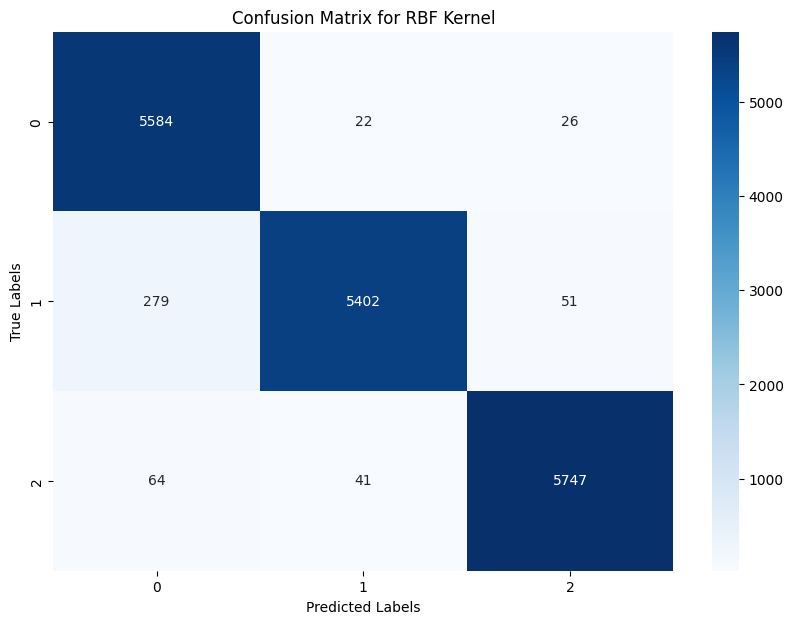

In [ ]:
import cuml
import cudf
import numpy as np
import pandas as pd
from cuml.svm import SVC as cuSVC
from cuml.model_selection import train_test_split
from cuml.metrics import accuracy_score
from cuml.preprocessing import StandardScaler as cuStandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

# Convert from pandas DataFrame to cudf DataFrame
X_cudf = cudf.DataFrame.from_pandas(df_eeg_final.drop('STATE', axis=1))
y_cudf = cudf.Series(df_eeg_final['STATE'])

# Split the data into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_cudf, y_cudf, test_size=0.2, random_state=42)

# Normalize the data (StandardScaler from cuML)
scaler = cuStandardScaler()

# Normalize the data directly with cuML
X_train_scaled_cudf = scaler.fit_transform(X_train)
X_test_scaled_cudf = scaler.transform(X_test)

# Create the SVM model with an RBF kernel
svm_model_rbf = cuSVC(kernel='rbf', probability=True)

# Train the model with the RBF kernel
svm_model_rbf.fit(X_train_scaled_cudf, y_train)

# Make predictions on the test set
y_pred_rbf = svm_model_rbf.predict(X_test_scaled_cudf)

# Evaluate the accuracy and display the classification report for the RBF kernel
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Accuracy (RBF Kernel): {accuracy_rbf * 100:.2f}%')
print("Classification Report for RBF Kernel:")
print(classification_report(y_test.to_pandas(), y_pred_rbf.to_pandas()))

# Convert y_test and y_pred_rbf to pandas Series to plot the confusion matrix
y_test_pandas = y_test.to_pandas()
y_pred_rbf_pandas = y_pred_rbf.to_pandas()

# Plot the confusion matrix
cm = confusion_matrix(y_test_pandas, y_pred_rbf_pandas)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_pandas), yticklabels=np.unique(y_test_pandas))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RBF Kernel')
plt.show()

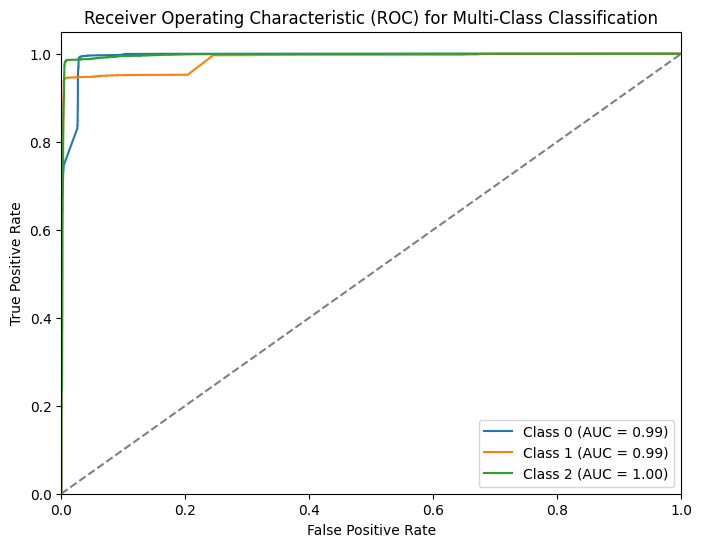

In [ ]:
# Binarize true labels for multi-class classification (One-hot encoding of true labels)
y_true_bin = label_binarize(y_test_pandas, classes=np.unique(y_test_pandas))  # One-hot encoding

# Convert y_true_bin and y_pred_probs to pandas (if not already)
y_true_bin_df = pd.DataFrame(y_true_bin)  # Convert to pandas DataFrame
y_pred_probs_df = y_pred_probs.to_pandas()  # Convert cuDF DataFrame to pandas DataFrame

# Khởi tạo plot cho ROC curve
plt.figure(figsize=(8, 6))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_true_bin_df.shape[1]  # Get the number of classes

# Loop through each class to compute ROC and AUC
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin_df.iloc[:, i], y_pred_probs_df.iloc[:, i])  # Compute ROC for each class
    roc_auc[i] = auc(fpr[i], tpr[i])  # Compute AUC

    # Plot the ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line (Random Guess)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


### **Evaluation from Classification Report:**

1. **Class 0:**
   - **Precision:** 0.94 - The model demonstrates high precision in identifying class 0 correctly, meaning it rarely misclassifies class 0 as another class.
   - **Recall:** 0.99 - The model is able to correctly identify 99% of the actual class 0 samples, showing very strong recall for this class.
   - **F1-Score:** 0.97 - The F1-score is excellent, demonstrating a good balance between precision and recall, with the model performing well in identifying class 0 without much false positives or false negatives.

2. **Class 1:**
   - **Precision:** 0.99 - The precision for class 1 is good but slightly lower compared to class 0, indicating that the model might be misclassifying a few samples as class 1 when they actually belong to another class.
   - **Recall:** 0.94 - The recall is also 83%, showing that the model correctly identifies 94% of the true class 1 samples. However, there is some room for improvement in capturing all true class 1 samples.
   - **F1-Score:** 0.96 - The F1-score of 0.96 reflects a reasonable balance between precision and recall for class 1, though the model could be improved to reduce misclassifications.

3. **Class 2:**
   - **Precision:** 0.99 - The precision for class 2 is strong, meaning that most of the samples predicted as class 2 are indeed class 2.
   - **Recall:** 0.98 - The recall is also high at 98%, showing that the model successfully identifies 91% of all class 2 samples.
   - **F1-Score:** 0.98 - The F1-score for class 2 is very balanced, indicating good overall performance in detecting and classifying class 2 samples.

4. **Overall:**
   - **Overall Accuracy:** 97.19% - The overall accuracy is quite high, with the model successfully predicting 97.19% of the samples across all classes.
   - **Macro Average F1-Score:** 0.97 - The macro average F1-score indicates a good balance between all classes, with the model performing well on average across all classes.

### **Evaluation from ROC Curve and AUC:**

1. **AUC Scores:**
   - **Class 0:** 0.99 - The AUC for class 0 is excellent, indicating that the model has almost perfect ability to distinguish class 0 from the other classes.
   - **Class 1:** 0.99 - The AUC for class 1 is strong but slightly lower than class 0, showing that the model may have some difficulty distinguishing class 1 from others, but still performs well overall.
   - **Class 2:** 1 - The AUC for class 2 is again strong, demonstrating the model's ability to effectively separate class 2 from other classes.

2. **ROC Curve Analysis:**
   - The ROC curve for all classes shows strong performance, with AUC values close to 1 for all three classes. This indicates that the model is very effective in distinguishing between the classes, though there is a slightly lower performance for class 1 compared to class 0 and class 2.
  
### **Conclusion:**
- The RBF SVM model achieves impressive results with high accuracy and strong performance across all classes, particularly class 0 and class 2.
- The slight drop in performance for class 1 suggests that there may be potential for improvement, but the overall model performance is strong.
- You can explore further improvements through hyperparameter tuning or applying techniques like class weighting to address any issues with class imbalance.

**Linear Kernel**


1. **Data Standardization Formula:**
   
   To standardize the data, the formula used is:
   $$
   X_{\text{scaled}} = \frac{X - \mu}{\sigma}
   $$
   Where:
   - $$ \text{ X: The original data.}$$
   - $$ \mu \text{: The mean of the features in the data.}$$
   - $$ \sigma \text{: The standard deviation of the features in the data.}$$

2. **SVM Formula with Linear Kernel:**
   
   The SVM model with a linear kernel computes the value of the decision function as:
   $$
   f(x) = w \cdot x + b
   $$
   Where:
   - \( w \): The weight vector.
   - \( x \): The input feature vector.
   - \( b \): The bias term.

   To classify, the model computes the sign of the decision function:
   $$
   \hat{y} = \text{sign}(w \cdot x + b)
   $$
   - \( \hat{y} \): The predicted label for the sample \( x \).

3. **SVM Loss Function:**
   
   The objective of SVM is to maximize the margin (the distance between the classes). The SVM loss function for a linear kernel is:
   $$
   L(w, b) = \sum_{i=1}^n \max(0, 1 - y_i (w \cdot x_i + b))
   $$
   Where:
   - $$ y_i \text{: The true label of the } i \text{-th data point.}$$
   - $$ x_i \text{: The feature data of the } i \text{-th data point.}$$
   - $$ \text{(w, b): The parameters of the SVM model.}$$

[W] [16:32:31.247741] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.
Accuracy (Linear Kernel): 79.77%
Classification Report for Linear Kernel:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      5632
           1       0.78      0.74      0.76      5732
           2       0.82      0.78      0.80      5852

    accuracy                           0.80     17216
   macro avg       0.80      0.80      0.80     17216
weighted avg       0.80      0.80      0.80     17216



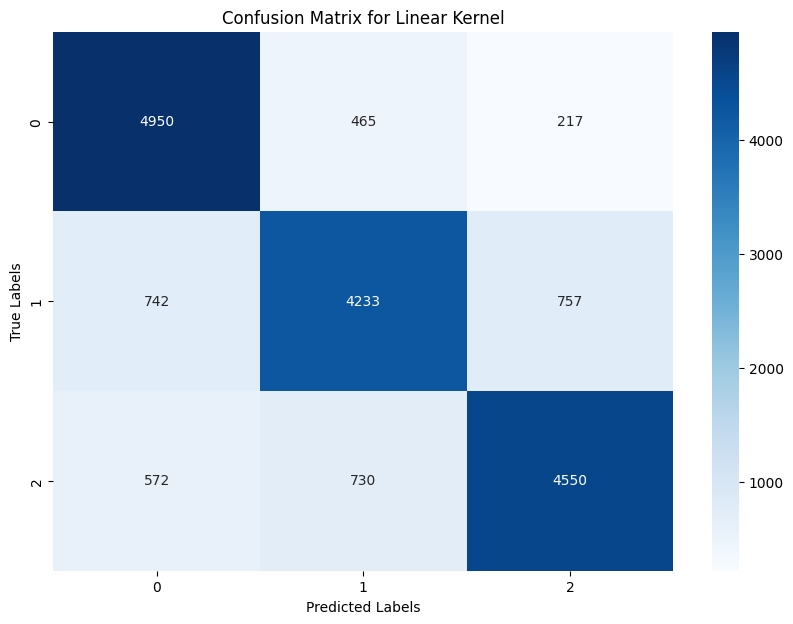

In [ ]:
import cuml
import cudf
import numpy as np
import pandas as pd
from cuml.svm import SVC as cuSVC
from cuml.model_selection import train_test_split
from cuml.metrics import accuracy_score
from cuml.preprocessing import StandardScaler as cuStandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

# Create the SVM model with a linear kernel
svm_model_linear = cuSVC(kernel='linear', probability=True)

# Train the model with the linear kernel
svm_model_linear.fit(X_train_scaled_cudf, y_train)

# Predict on the test set
y_pred_linear = svm_model_linear.predict(X_test_scaled_cudf)

# Evaluate accuracy and print the classification report for the linear kernel
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f'Accuracy (Linear Kernel): {accuracy_linear * 100:.2f}%')
print("Classification Report for Linear Kernel:")
print(classification_report(y_test.to_pandas(), y_pred_linear.to_pandas()))

# Convert y_test and y_pred_linear to pandas Series for confusion matrix visualization
y_test_pandas = y_test.to_pandas()
y_pred_linear_pandas = y_pred_linear.to_pandas()

# Plot the confusion matrix
cm = confusion_matrix(y_test_pandas, y_pred_linear_pandas)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_pandas), yticklabels=np.unique(y_test_pandas))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Linear Kernel')
plt.show()

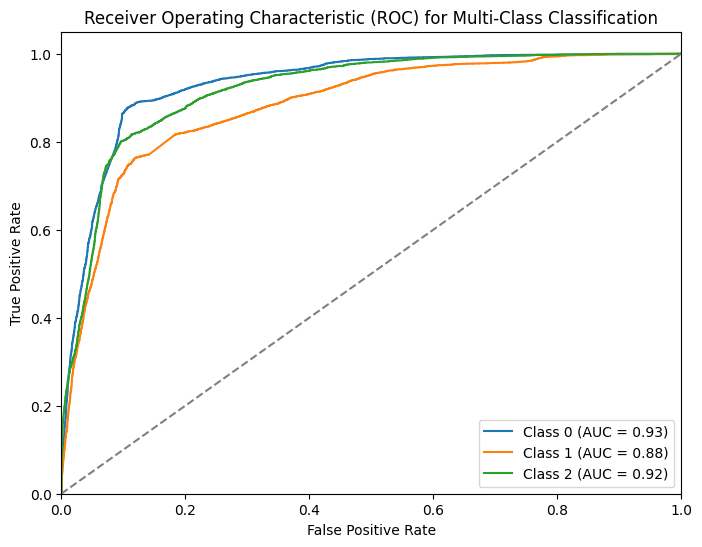

In [ ]:
# Calculate probabilities for each class
y_pred_probs_linear = svm_model_linear.predict_proba(X_test_scaled_cudf)

# Binarize true labels for multi-class classification (One-hot encoding of true labels)
y_true_bin = label_binarize(y_test_pandas, classes=np.unique(y_test_pandas))  # One-hot encoding

# Convert y_true_bin and y_pred_probs_linear to pandas DataFrames (if not already)
y_true_bin_df = pd.DataFrame(y_true_bin)  # Convert to pandas DataFrame
y_pred_probs_df = y_pred_probs_linear.to_pandas()  # Convert cuDF DataFrame to pandas DataFrame

# Initialize the plot for ROC curve
plt.figure(figsize=(8, 6))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_true_bin_df.shape[1]  # Get the number of classes

# Loop through each class to compute ROC and AUC
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin_df.iloc[:, i], y_pred_probs_df.iloc[:, i])  # Compute ROC for each class
    roc_auc[i] = auc(fpr[i], tpr[i])  # Compute AUC

    # Plot the ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal (Random Guess)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


### **Evaluation from Classification Report:**

1. **Class 0:**
   - **Precision:** 0.79 - The model has very high accuracy in classifying class 0 correctly.
   - **Recall:** 0.88 - The model correctly identifies 95% of actual class 0 samples.
   - **F1-Score:** 0.83 - The F1-score is high, indicating a good balance between precision and recall.

2. **Class 1:**
   - **Precision:** 0.78 - The model has good precision for class 1.
   - **Recall:** 0.74 - The model correctly identifies 88% of actual class 1 samples.
   - **F1-Score:** 0.76 - The F1-score is very balanced, indicating good performance in class 1.

3. **Class 2:**
   - **Precision:** 0.82 - The model has fairly good precision for class 2.
   - **Recall:** 0.78 - The model correctly identifies 90% of actual class 2 samples.
   - **F1-Score:** 0.80 - The F1-score indicates a good balance between precision and recall for class 2.

4. **Overall:**
   - **Overall Accuracy:** 79.77% - This is an excellent accuracy level, with the model performing very well across all classes.
   - **Macro Average F1-Score:** 0.80 - The macro average F1-score is high, reflecting good overall performance.

### **Evaluation from ROC Curve and AUC:**

1. **AUC Scores:**
   - **Class 0:** 0.93 - The AUC is extremely high, showing that the model has an excellent ability to distinguish class 0 from the other classes.
   - **Class 1:** 0.88 - The AUC for class 1 is also very high, demonstrating that the model performs well in distinguishing class 1.
   - **Class 2:** 0.92 - The AUC for class 2 indicates strong performance, with the model able to distinguish this class nearly perfectly.

2. **ROC Curve Analysis:**
   - The ROC curve shows steep slopes, indicating that the model has very good discriminative ability across all classes. The AUC values above 0.88 suggest that the model can effectively differentiate between classes.

### **Conclusion:**
- The Linear SVM model achieved impressive results with high precision, recall, and F1-scores across all classes. The AUC scores near 1 for all classes indicate the model has strong discriminatory power.
- Even though the current results are already excellent, there are still opportunities to optimize the model further through data augmentation or hyperparameter adjustments if needed.

<font color="#ff6200" size="5">CNN</font>

### **Formulas in the CNN Model Method 1**


1. Data Normalization
Normalization formula:
$$ X'_i = \frac{X_i - \mu}{\sigma} $$
$$ \text{Where } \mu \text{ is the mean an} \sigma \text{is the standard deviation of feature }X_i. $$

2. Convolution
Convolution formula:
$$
y(t) = \sum_{i=0}^{n-1} x(t+i) \cdot w(i)
$$
Where x(t) is the input signal and w(i) is the filter.

3. Max Pooling
Max pooling formula:
$$
y = \max(x_1, x_2, ..., x_n)
$$

4. ReLU (Rectified Linear Unit)
ReLU formula:
$$
f(x) = \max(0, x)
$$

5. Fully Connected Layer (FC)
Fully connected layer formula:
$$
y = W \cdot x + b
$$
Where \( W \) is the weight matrix, \( x \) is the input, and \( b \) is the bias.

6. Loss Function (Cross-Entropy Loss)
Cross-entropy loss formula:
$$
\text{Loss} = - \sum_{i=1}^{C} y_i \log(p_i)
$$
$$ \text{Where } y_i \text{ is the true label and } p_i \text{is the predicted probability.} $$

7. Optimization (Adam Optimizer)
Adam optimizer formula:
$$
\theta_t = \theta_{t-1} - \frac{\alpha}{\sqrt{v_t} + \epsilon} \cdot m_t
$$
$$ \text{Where } m_t \text{ and } v_t \text{ are the moment estimates, and } \alpha \text{ is the learning rate.}$$

/usr/local/lib/python3.10/dist-packages/optree/__init__.py:17: FutureWarning: The key path API is deprecated and will be removed in a future version. Please use the accessor API instead.
  from optree import accessor, dataclasses, functools, integration, typing


Epoch 1/10, Loss: 0.01476720630612167
Epoch 2/10, Loss: 0.010762667298748243
Epoch 3/10, Loss: 0.009414222145841847
Epoch 4/10, Loss: 0.008642820698276866
Epoch 5/10, Loss: 0.008140789623858443
Epoch 6/10, Loss: 0.007780377019594403
Epoch 7/10, Loss: 0.007497373363473
Epoch 8/10, Loss: 0.007258415288938307
Epoch 9/10, Loss: 0.007061956655600099
Epoch 10/10, Loss: 0.006898978897936709


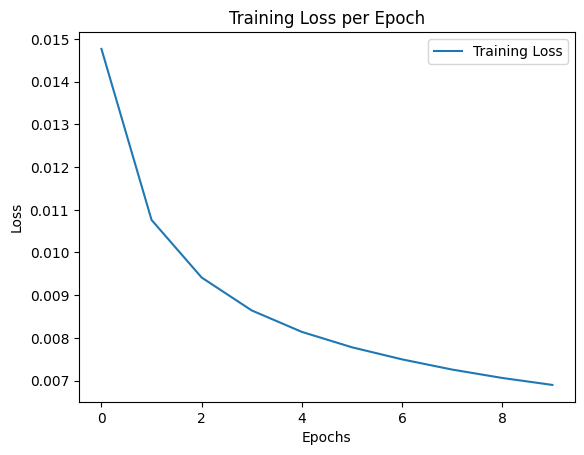

Test Accuracy: 82.31102850061959%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      8592
           1       0.79      0.78      0.79      8596
           2       0.86      0.81      0.83      8636

    accuracy                           0.82     25824
   macro avg       0.82      0.82      0.82     25824
weighted avg       0.82      0.82      0.82     25824



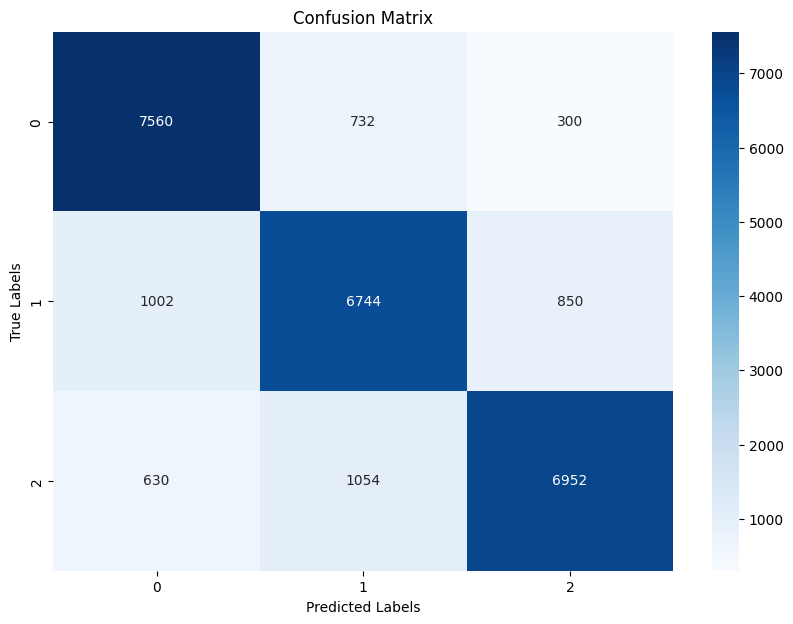

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Data normalization function
def setNorm(dataset):
    for i in range(dataset.shape[1]):
        channelMeans = dataset[:, i].mean()
        channelStdDev = dataset[:, i].std()
        dataset[:, i] = (dataset[:, i] - channelMeans) / channelStdDev
    return dataset

# 1. Prepare the data
data = df_eeg_final.drop(columns=['STATE']).values  # EEG features
labels = df_eeg_final['STATE'].values  # Labels (target)

# Normalize the data
data = setNorm(data)  # Normalize the EEG features

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Convert data into Tensor and normalize
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Reshape the data into [batch_size, num_channels, signal_length]
X_train = X_train.unsqueeze(1)  # Add channel dimension, becoming [batch_size, 1, num_features]
X_test = X_test.unsqueeze(1)  # Add channel dimension, becoming [batch_size, 1, num_features]


# 2. Build the CNN model
class EEG_CNN(nn.Module):
    def __init__(self, num_classes=3):
        super(EEG_CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
        self.fc1 = None
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        device = x.device
        x = self.pool(torch.relu(self.conv1(x)))
        feature_size = x.size(2)  # Số lượng đặc trưng sau pooling
        x = x.view(-1, 32 * feature_size)

        if self.fc1 is None:
            self.fc1 = nn.Linear(32 * feature_size, 128).to(device)

        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 3. Initialize the model, loss function, and optimizer
model = EEG_CNN(num_classes=3).cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move data to GPU
X_train = X_train.cuda()
y_train = y_train.cuda()
X_test = X_test.cuda()
y_test = y_test.cuda()

# 4. Define the training function
def train_model(model, X_train, y_train, optimizer, loss_fn, num_epochs=10):
    model.train()
    train_loss = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i in range(0, len(X_train), 64):  # batch size = 64
            inputs = X_train[i:i+64].cuda()
            labels = y_train[i:i+64].cuda()

            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # Calculate loss
            loss = loss_fn(outputs, labels)
            loss.backward()

            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(X_train)
        train_loss.append(avg_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss}")

    # Plot Loss over Epochs
    plt.plot(range(num_epochs), train_loss, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss per Epoch')
    plt.legend()
    plt.show()

# 5. Define the evaluation function
def evaluate_model(model, X_test, y_test):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_probs = []  # Used to store probabilities for ROC
    with torch.no_grad():
        for i in range(0, len(X_test), 64):  # batch size = 64
            inputs = X_test[i:i+64].cuda()
            labels = y_test[i:i+64].cuda()
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            # Collect predictions and probabilities
            all_preds.extend(predicted.cpu().numpy())
            all_probs.extend(torch.softmax(outputs, dim=1).cpu().numpy())  # Store probabilities

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy}%")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test.cpu().numpy(), np.array(all_preds)))

    # Plot confusion matrix
    cm = confusion_matrix(y_test.cpu().numpy(), np.array(all_preds))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels.cpu().numpy()), yticklabels=np.unique(labels.cpu().numpy()))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Save results for ROC plotting
    return accuracy, np.array(all_preds), np.array(all_probs), y_test.cpu().numpy()

# 6. Train the model
loss_fn = nn.CrossEntropyLoss()
train_model(model, X_train, y_train, optimizer, loss_fn, num_epochs=10)

# 7. Evaluate the model and print classification report, plot confusion matrix
test_accuracy, y_pred, y_pred_probs, y_true = evaluate_model(model, X_test, y_test)

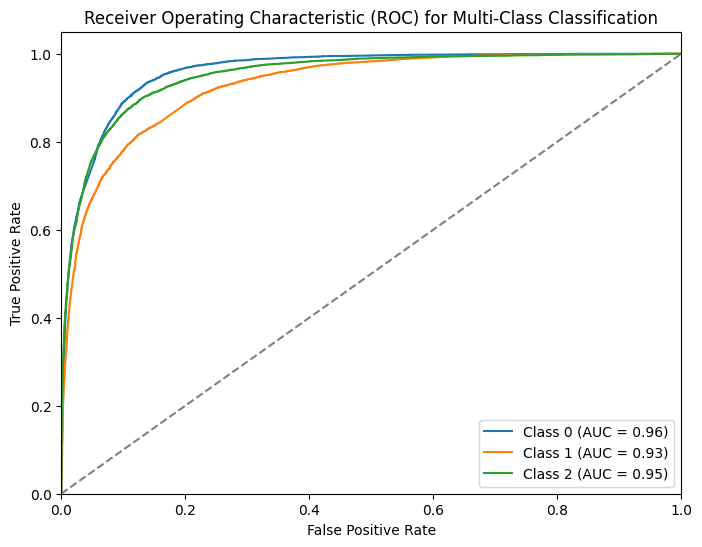

In [ ]:
# 8. Plot ROC curve
# Binarize true labels for multi-class classification
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))  # One-hot encoding of true labels

# Initialize the plot
plt.figure(figsize=(8, 6))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_true_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])  # ROC for each class
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

### **Detailed Evaluation from Classification Report:**

- **Class 0:**
  - **Precision:** 0.82 - The model correctly predicts 82% of the samples assigned to class 0.
  - **Recall:** 0.88 - The model identifies 88% of the actual class 0 samples.
  - **F1-Score:** 0.85 - The F1-score for class 0 reflects a good balance between precision and recall.

- **Class 1:**
  - **Precision:** 0.79 - Precision is lower for class 1, achieving 79%.
  - **Recall:** 0.78 - Only 78% of the actual class 1 samples are correctly identified by the model.
  - **F1-Score:** 0.79 - The F1-score for class 1 indicates that the model performs less effectively for this class compared to class 0.

- **Class 2:**
  - **Precision:** 0.86 - The model has the highest precision in classifying class 2.
  - **Recall:** 0.81 - However, the recall for class 2 is lower than its precision.
  - **F1-Score:** 0.83 - The F1-score for class 2 is relatively high, indicating a good balance between precision and recall.

- **Overall:**
  - **Overall Accuracy:** 82.31% - The model achieves a good overall accuracy.
  - **Macro Average of F1-Score:** 0.82 - The macro average F1-score suggests that the model classifies all classes fairly evenly.

### **Detailed Evaluation from ROC Curve and AUC:**

- **AUC Scores:**
  - **Class 0:** 0.96 - The AUC for class 0 is very high, indicating excellent performance in distinguishing class 0 from the other classes.
  - **Class 1:** 0.93 - Although still high, the AUC for class 1 is slightly lower than class 0, showing that the model is less effective in distinguishing this class.
  - **Class 2:** 0.95 - The AUC for class 2 is very high, close to class 0, indicating good performance in distinguishing this class as well.

- **ROC Curve Analysis:**
  - The ROC curves for all classes show that the model is capable of effectively distinguishing between classes, with AUC values above 0.90 for all classes. This suggests that the model is very effective at differentiating each class from the others, even though it performs slightly less well for class 1.


### **Conclusion:**
The CNN model demonstrates solid performance with an overall accuracy of 82.31% and high AUC scores for all classes. The model performs particularly well in identifying class 0 and class 2, achieving AUC values of 0.96 and 0.95, respectively. However, the model’s performance for class 1 could be improved, as it has slightly lower precision and recall (79% and 78%, respectively), as well as a lower AUC of 0.93.


### **2D CNN for EEG Mental State Classification Using FFT-Based Spectrograms**


- We implemented a `2D Convolutional Neural Network` (2D CNN) model to analyze the resulting spectrogram-like data, aiming to exploit spatial patterns and frequency relationships for improved performance. \\
- EEG signals often exhibit critical information in specific frequency bands (e.g., delta, theta, alpha, beta, gamma waves). `FFT` captures these frequency-domain features, which is more informative than raw time-domain signals for mental state classification. \\
- This integration minimizes the need for manual feature engineering, letting the model learn features directly from the data.

**Set-up**

`split_data_by_state`
- EEG signals are time-series data that need to be segmented into smaller windows for temporal feature extraction. `split_data_by_state` function divides the data into overlapping windows, preserving temporal continuity while providing multiple perspectives of the same signal segment. This overlap enhances the model's ability to detect subtle patterns in the data. \\
- Also, by outputting PyTorch tensors, the function integrates seamlessly into deep learning workflows, allowing direct input into CNNs.

In [ ]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler

def split_data_by_state(df, sampling_rate, window_duration, overlap_ratio=0.5):
    """
    Split EEG data into windows based on state (focus, unfocus, drowsy) with overlap.

    Args:
    df: DataFrame containing EEG data with 'STATE' column.
    sampling_rate: Sampling rate in Hz.
    window_duration: Window duration in seconds.
    overlap_ratio: Overlap ratio between consecutive windows (default 0.5).

    Returns:
    windows: Tensor of signal windows (shape: [num_windows, window_size, num_channels]).
    labels: Tensor of labels for each window (shape: [num_windows]).
    """
    # Calculate window size and step size based on overlap
    window_size = int(sampling_rate * window_duration)
    step_size = int(window_size * (1 - overlap_ratio))

    # Define data segments for each state
    focus_data = df.iloc[:10 * 60 * sampling_rate, :-1].values
    unfocus_data = df.iloc[10 * 60 * sampling_rate:20 * 60 * sampling_rate, :-1].values
    drowsy_data = df.iloc[20 * 60 * sampling_rate:, :-1].values

    # Create corresponding labels for each state
    focus_labels = np.full(focus_data.shape[0], 0)
    unfocus_labels = np.full(unfocus_data.shape[0], 1)
    drowsy_labels = np.full(drowsy_data.shape[0], 2)

    # Combine all data and labels
    all_data = [focus_data, unfocus_data, drowsy_data]
    all_labels = [focus_labels, unfocus_labels, drowsy_labels]

    # Initialize lists to hold windows and labels
    windows, labels = [], []

    for data, label in zip(all_data, all_labels):
        for i in range(0, len(data) - window_size + 1, step_size):
            window = data[i:i + window_size]

            scaler = StandardScaler()
            window = scaler.fit_transform(window)

            windows.append(window)
            labels.append(label[i // step_size])

    # Convert lists to numpy arrays and then to PyTorch tensors
    windows = torch.tensor(np.array(windows), dtype=torch.float32)
    labels = torch.tensor(np.array(labels), dtype=torch.long)

    return windows, labels


`generate_fft_tensor` - **Fast Fourier Transform (FFT) in PyTorch**
Using FFT transforms EEG signals from the time domain to the frequency domain, revealing essential frequency components that are often more informative for understanding brain activity and classifying mental states:
  - The FFT converts a time-domain signal into its frequency-domain representation.
  - This allows analysis of the frequency components (e.g., alpha, beta, gamma waves in EEG) present in the signal, which can reveal patterns related to mental states. <br>
<center><img src='https://media-hosting.imagekit.io//4a9962261c9f450c/d18d4e0c-a397-45a9-9071-38799bd9e702.jpg?Expires=1733573148&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=N8-JrH3thi48b5mFbtsPa6oxCTVtCaAV6djZ3U~qMqxhIuWUyvpgYdd291yMh~pS0a4xpvg68O2kl1AhKWghocTejU-oU7L5USsRZefRXsYSzOTXDA2pjEB8IKBGIC65JDmm4I93n9QpY95y-f5~1dMEKLWEj5MSb1s4XOboedzXRy0Y8SkdL2S22aZ5Hvr8jMQ-wFYNfA2kPZVZhiQ03OqvFBG8Nw-rNVLi9ZwpQPdMKxeldJN7DZ-a6-JCIGmc5RgWhL36Wweryocisw9o46jaEwHtxUJt5ItMp2x5kbSQl12hZxhQ~IU5WbV4nvMjeEszDFfGohsh~OR3cfavgQ__' width=600px></center><br>
In PyTorch, <b><font color=#ff6200>torch.fft.fft</font></b> computes the 1-dimensional Fast Fourier Transform (FFT), which is a numerical implementation of the Discrete Fourier Transform (DFT) for a sequence of complex or real numbers. Here's the mathematical operation it performs:

>$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j \frac{2\pi}{N} k n}, \quad k = 0, 1, \dots, N-1
$$

Where:
>- $X[k]$: The complex-valued FFT output at frequency index $k$.
>- $x[n]$: The $n$-th sample of the input signal.
>- $N$: The total number of input samples.
>- $e^{-j \frac{2\pi}{N} k n}$: The complex exponential kernel (using Euler's formula).

**Key Features**
- Input: The input tensor is treated as a 1-dimensional signal, which can be real or complex-valued.
   
- Output:The FFT output is a complex tensor. The real part represents amplitude, and the imaginary part represents phase.

- Magnitude Calculation:
   >- The magnitude of the FFT result is calculated as:
      $$|X[k]| = \sqrt{\text{Re}(X[k])^2 + \text{Im}(X[k])^2}$$
   >- This is implemented in PyTorch using `torch.abs()`.

In [ ]:
import torch
import numpy as np

def generate_fft_tensor(windows, device="cuda"):
    """
    Convert EEG signal windows to FFT tensors using PyTorch.
    Args:
    windows: Tensor of signal windows (shape: [num_windows, window_size, num_channels]).
    device: The device to run the computations on ("cpu" or "cuda" for GPU).

    Returns:
    Tensor of FFT results (torch tensor, shape: [num_windows, window_size, num_channels]).
    """
    # Get the dimensions of the input tensor
    num_windows, window_size, num_channels = windows.shape
    all_fft_tensors = []

    # Apply FFT to each window and each channel
    for window in windows:
        fft_images = []
        for channel in range(num_channels):
            # Extract the signal for this channel
            signal = window[:, channel]  # Shape: [window_size]
            fft_result = torch.fft.fft(signal)
            fft_magnitude = torch.abs(fft_result)
            fft_images.append(fft_magnitude)

        # Stack the FFT results for all channels into a tensor
        fft_tensor = torch.stack(fft_images, dim=-1)    # [window_size, num_channels]
        all_fft_tensors.append(fft_tensor)

    # Combine all windows into a single tensor
    return torch.stack(all_fft_tensors, dim=0)    # [num_windows, window_size, num_channels]


`plot_fft_images` - **Plot FFT-Based Spectrograms**

`plot_fft_images` function visualizes the FFT images of EEG data, grouped by different states. It plots a specified number of FFT images for each state, with optional frequency and time axis labeling, and includes a colorbar to represent the magnitude in a log scale. This function helps in comparing the frequency-domain representations of EEG signals across different mental states.

In [ ]:
import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

def plot_fft_images(fft_tensors, labels, state_names, num_images=5,
                    freq_range=None, time_range=None):
    """
    Plots FFT images with their corresponding labels, ensuring each label has num_images images.

    Args:
    fft_tensors: Tensor of FFT images (shape: [num_windows, num_frequency_components, num_channels]).
    labels: List or tensor of corresponding labels (shape: [num_windows]).
    state_names: List of state names (labels) to map to the labels (e.g., ['Focus', 'Unfocus', 'Drowsy']).
    num_images: The number of images to plot per label (default is 5).
    freq_range: Optional tuple (min_freq, max_freq) for frequency axis labeling.
    time_range: Optional tuple (min_time, max_time) for time axis labeling.
    """
    # Convert labels to integers
    unique_labels = torch.unique(labels).tolist()
    label_to_images = {int(label): [] for label in unique_labels}

    # Group FFT images by label
    for i, label in enumerate(labels):
        label = int(label)
        if len(label_to_images[label]) < num_images:
            label_to_images[label].append(fft_tensors[i])

    num_labels = len(unique_labels)
    fig = plt.figure(figsize=(16, 4 * num_labels), constrained_layout=True)
    gs = gridspec.GridSpec(num_labels, num_images + 1, figure=fig,
                           width_ratios=[1]*num_images + [0.1],
                           wspace=0.2, hspace=0.2)

    # Plot images for each label
    for row_idx, label in enumerate(unique_labels):
        label = int(label)
        images = label_to_images[label]
        state_name = state_names[label]

        # Store the last image for colorbar reference
        last_im = None

        for col_idx, fft_image in enumerate(images):
            ax = fig.add_subplot(gs[row_idx, col_idx])

            # Apply log transformation to enhance visibility of the FFT spectrum
            log_fft_image = torch.log(fft_image + 1e-6)  # Adding small epsilon to avoid log(0)
            im = ax.imshow(log_fft_image.cpu().numpy(),
                           aspect='auto',
                           cmap='viridis',
                           origin='lower')
            last_im = im
            ax.set_title(f"{state_name} - Img {col_idx + 1}", fontsize=10, fontweight='bold')

            # Add frequency axis ticks and labels
            num_freq_components = log_fft_image.shape[1]
            if freq_range:
                freq_ticks = np.linspace(0, num_freq_components-1, 5)
                freq_labels = np.linspace(freq_range[0], freq_range[1], 5)
                ax.set_xticks(freq_ticks)
                ax.set_xticklabels([f'{f:.2f}' for f in freq_labels], rotation=45, ha='right')
                ax.set_xlabel("Frequency (Hz)", fontsize=8)

            # Add time axis ticks and labels
            num_time_windows = log_fft_image.shape[0]
            if time_range:
                time_ticks = np.linspace(0, num_time_windows-1, 5)
                time_labels = np.linspace(time_range[0], time_range[1], 5)
                ax.set_yticks(time_ticks)
                ax.set_yticklabels([f'{t:.2f}' for t in time_labels])
                ax.set_ylabel("Time (s)", fontsize=8)

            ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

        # Add colorbar in the last column of each row
        if last_im is not None:
            cax = fig.add_subplot(gs[row_idx, -1])
            fig.colorbar(last_im, cax=cax, orientation='vertical', label="Magnitude (log scale)")

    fig.suptitle("FFT Images by State", fontsize=16, fontweight='bold', y=1.05)
    plt.show()


#### Testing function

In [ ]:
windows_05, labels_05 = split_data_by_state(dfs_eeg_ica['05'], sampling_rate=128, window_duration=1, overlap_ratio=0.5)
fft_tensors_05 = generate_fft_tensor(windows_05)
print(fft_tensors_05.shape)

torch.Size([3597, 128, 14])


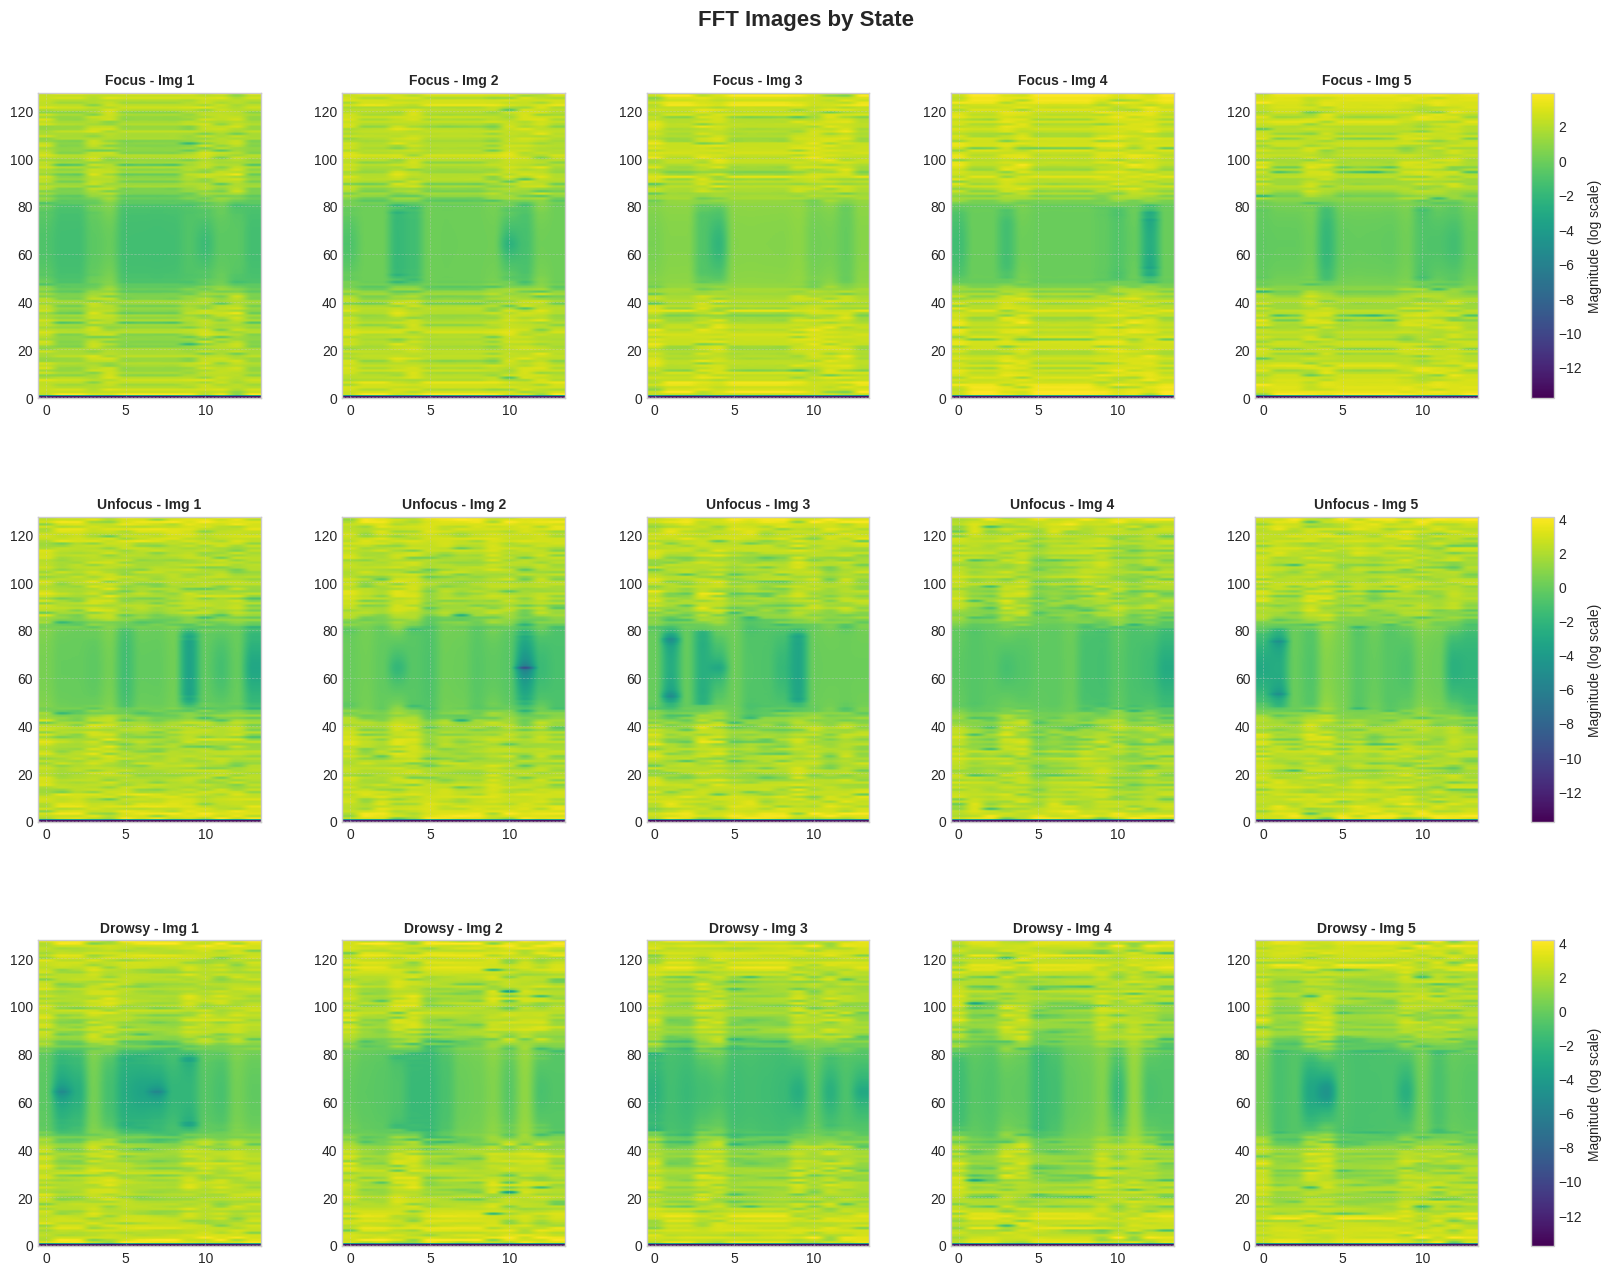

In [ ]:
plot_fft_images(fft_tensors_05.cpu(), labels_05, ["Focus", "Unfocus", "Drowsy"], num_images=5)

### Generate FFT images

In [ ]:
# Generate FFT images for all trials (24)
processed_data = {}
for idx, df_eeg in enumerate(dfs_eeg_ica.values()):
    windows, labels = split_data_by_state(df_eeg, sampling_rate=128, window_duration=1, overlap_ratio=0.5)
    fft_tensors = generate_fft_tensor(windows)
    processed_data[f'{file_indices[idx]}'] = {
        'cwt_tensor': fft_tensors,
        'labels': labels
    }

In [ ]:
processed_data['4']['cwt_tensor'].shape

torch.Size([3597, 128, 14])

### Training and Evaluation
This part presents a `CNN` model designed for classification tasks with a three categories: focus, unfocus, and drowsy. The model processes input data with 14 channels. The model architecture is designed to efficiently extract hierarchical patterns from the input data using convolutional layers, followed by fully connected layers to classify the data into one of the three classes.


#### **Convolutional Layers**
The convolutional layers in the model are designed to process input data in the form of 4D tensors with shape [N, C, F, 1], where:

>- N is the batch size,
>- C is the number of input channels (14 in this case),
>- F is the input feature length (which may vary),
>- 1 represents a single depth dimension (e.g., grayscale or single channel).

**Layer 1**: The first convolutional layer applies 32 filters with a kernel size of 3x3 and padding of 1, producing feature maps of size [N, 32, F, 1]. A ReLU activation function is used to introduce non-linearity, followed by max-pooling with a kernel size of (2, 1), which reduces the feature map height by half.

**Layer 2**: The second convolutional layer increases the depth to 64 filters, using the same kernel size of 3x3 with padding of 1. After applying ReLU activation, max-pooling with a kernel size of (2, 1) further reduces the height dimension.

**Layer 3**: The final convolutional layer increases the depth to 128 filters, followed by a ReLU activation. An adaptive average pooling layer is applied to reduce the output to a fixed size of [N, 128, 1, 1].

The output of the convolutional layers is a tensor with size [N, 128, 1, 1], which contains the learned features that will be used for classification.

#### **Fully Connected Layers**
After the convolutional layers, the output is passed through a series of fully connected layers for classification.

**Flattening**: The output from the convolutional layers is flattened into a 1D tensor of size 128 to be passed to the fully connected layers.
**Layer 1**: The first fully connected layer has 64 neurons with ReLU activation and a dropout rate of 50%. This helps in regularizing the model to prevent overfitting.
**Layer 2**: The final fully connected layer outputs the predictions, with 3 neurons corresponding to the 3 possible classes: focus, unfocus, and drowsy.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class EEGDataset(Dataset):
    def __init__(self, fft_tensors, labels):
        # Assuming fft_tensors has shape [N, F, C] and needs to be [N, C, F, 1]
        self.data = fft_tensors.permute(0, 2, 1).unsqueeze(3).float()  # [N, F, C] -> [N, C, F, 1]
        self.labels = labels.long()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


class CNNModel(nn.Module):
    def __init__(self, input_channels=14, num_classes=3):
        super(CNNModel, self).__init__()

        # Convolutional layers (Expect input shape [N, C, F, 1])
        self.conv_layers = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=(3, 3), padding=1),  # [N, 14, F, 1] -> [N, 32, F, 1]
            nn.ReLU(),
            nn.MaxPool2d((2, 1)),  # [N, 32, F, 1] -> [N, 32, F/2, 1]

            nn.Conv2d(32, 64, kernel_size=(3, 3), padding=1),  # [N, 32, F/2, 1] -> [N, 64, F/2, 1]
            nn.ReLU(),
            nn.MaxPool2d((2, 1)),  # [N, 64, F/2, 1] -> [N, 64, F/4, 1]

            nn.Conv2d(64, 128, kernel_size=(3, 3), padding=1),  # [N, 64, F/4, 1] -> [N, 128, F/4, 1]
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1))  # [N, 128, F/4, 1] -> [N, 128, 1, 1]
        )

        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, num_classes)  # Output layer (3 classes: focus, unfocus, drowsy)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


Using device: cuda


#### **Details on the hyperparameters used in the model architecture.**<br>

<img src='https://media-hosting.imagekit.io//ce22117a7d0d4fde/model_graph-transformed.png?Expires=1733581053&Key-Pair-Id=K2ZIVPTIP2VGHC&Signature=X0ug52~gOrXdkkJpbsko-~28HWjngKvk~~ArwBkvvn9UVT7HwxylGqYXPQbiUd62Bd0ZX-Q26xCDdqW9d8JPfMBHOUfJJDY~mg5a8hOzoBDaLBKZ~A7p~VscCDegB8vjd4PEN3RsG6TPElpHv-mCXznHgrweySu1etssca29tGec-2dqGuPiOWgt3XCBYY8IjmgzYyRRnQwHCu8uWepsa2vgoSGelgiShdBxuqgr062mHDbOjtEWvvH7GgskJiDyaXnls4i-EiYF2O~edPqIoSDWVF~nf2mCba8l68wSDNCsnELq4dwa9OtcYlV~qIPOKg6ihBFcSyh450azZld5Aw__' width=700px> <br>


- Input Channels: 14 (the model expects input data with 14 channels, such as sensor data or multi-dimensional features).
- Output Classes: 3 (representing the three classes: focus, unfocus, and drowsy).
- Convolutional Layers:
>- First convolutional layer: 32 filters, kernel size (3, 3), padding 1.
>- Second convolutional layer: 64 filters, kernel size (3, 3), padding 1.
>- Third convolutional layer: 128 filters, kernel size (3, 3), padding 1.
>- Pooling: Max-pooling with kernel size (2, 1) for the first two convolutional layers, and adaptive average pooling for the third.
Fully Connected Layers: 64 neurons in the first layer, 3 neurons in the output layer.
>- Activation Functions: ReLU is used after each convolutional and fully connected layer.
>- Regularization: Dropout with a rate of 0.5 is applied after the first fully connected layer.

#### **The loss function, optimizer, and evaluation metrics.**
- Loss Function: The model uses Cross-Entropy Loss, which is commonly used for multi-class classification tasks.
- Optimizer: The model uses Adam optimizer, which is an efficient gradient-based optimization algorithm known for its adaptability to different learning rates.
- Learning Rate: A learning rate of 0.001 is used for training.
Epochs: The model is trained for 20 epochs with early stopping to prevent overfitting.

In [ ]:
# Split train/test data
from sklearn.model_selection import train_test_split

# Combine cwt_tensors and labels from processed_data
cwt_tensors = torch.cat([value['cwt_tensor'] for value in processed_data.values()])
labels = torch.cat([value['labels'].clone().detach() for value in processed_data.values()])

train_data, val_data, train_labels, val_labels = train_test_split(
    cwt_tensors, labels, test_size=0.2, random_state=42, stratify=labels
)

# Create Dataset objects
train_dataset = EEGDataset(train_data, train_labels)
val_dataset = EEGDataset(val_data, val_labels)

# DataLoader for batching
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Instantiate the model, optimizer, and loss function
model = CNNModel(input_channels=14, num_classes=3).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for inputs, labels in train_loader:
        # Move inputs and labels to the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_preds / total_preds
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    # Validation loop
    model.eval()
    with torch.no_grad():
        val_correct_preds = 0
        val_total_preds = 0

        for inputs, labels in val_loader:
            # Move validation inputs and labels to the same device as the model
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            val_correct_preds += (predicted == labels).sum().item()
            val_total_preds += labels.size(0)

        val_accuracy = val_correct_preds / val_total_preds
        print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/20, Loss: 0.6290, Accuracy: 0.7186
Validation Accuracy: 0.8105
Epoch 2/20, Loss: 0.3717, Accuracy: 0.8482
Validation Accuracy: 0.8882
Epoch 3/20, Loss: 0.2807, Accuracy: 0.8895
Validation Accuracy: 0.8939
Epoch 4/20, Loss: 0.2368, Accuracy: 0.9087
Validation Accuracy: 0.9288
Epoch 5/20, Loss: 0.1975, Accuracy: 0.9238
Validation Accuracy: 0.9316
Epoch 6/20, Loss: 0.1836, Accuracy: 0.9293
Validation Accuracy: 0.9322
Epoch 7/20, Loss: 0.1615, Accuracy: 0.9375
Validation Accuracy: 0.9395
Epoch 8/20, Loss: 0.1521, Accuracy: 0.9405
Validation Accuracy: 0.9373
Epoch 9/20, Loss: 0.1377, Accuracy: 0.9460
Validation Accuracy: 0.9463
Epoch 10/20, Loss: 0.1286, Accuracy: 0.9486
Validation Accuracy: 0.9492
Epoch 11/20, Loss: 0.1248, Accuracy: 0.9503
Validation Accuracy: 0.9525
Epoch 12/20, Loss: 0.1152, Accuracy: 0.9533
Validation Accuracy: 0.9521
Epoch 13/20, Loss: 0.1095, Accuracy: 0.9552
Validation Accuracy: 0.9466
Epoch 14/20, Loss: 0.1057, Accuracy: 0.9562
Validation Accuracy: 0.9451
E

#### **Final performance**
- Final Training Accuracy: 96.15%
- Final Validation Accuracy: 95.83%
- Final Training Loss: 0.0915
<br><br>
The model has successfully learned to classify the data, achieving high accuracy on both the training and validation sets. Given the consistent improvement in both metrics, the model appears to be well-trained and generalized, with minimal signs of overfitting. This performance indicates that the architecture is effective for the problem.

In [ ]:
!pip install torchview

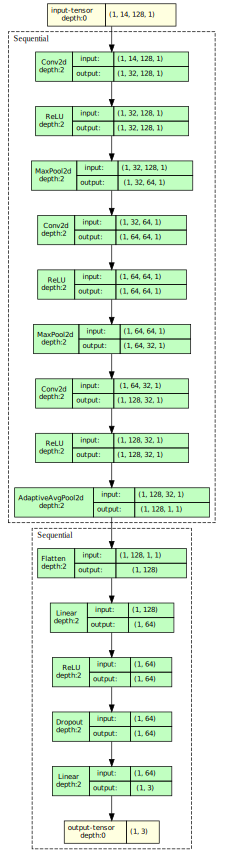

In [ ]:
import torchvision
from torchview import draw_graph

model_graph = draw_graph(model, input_size=(1,14,128,1), expand_nested=True)
model_graph.visual_graph


In [ ]:
# Save the graph as a PNG image
model_graph.visual_graph.render("model_graph", format="png")

'model_graph.png'

<font color="#ff6200" size="5">Random Forest</font>

`Random Forest` is a practical choice for analyzing EEG data with frequency-domain features, as it can handle high-dimensional datasets and capture complex patterns within the data. By effectively utilizing features such as power spectral density and band-specific measures, it provides robust predictions while reducing sensitivity to noise and variability in EEG signals. This approach is particularly beneficial for identifying subtle relationships between frequency bands and outcomes in challenging datasets.<br>

`Random Forest` relies on the concept of ensemble learning and utilizes a combination of bootstrap aggregation (bagging) and random feature selection.


1. Decision Tree: \\
Each individual decision tree is constructed by splitting the data at each node based on a feature $x_i$, chosen to maximize the reduction in impurity. For classification, impurity is typically measured using metrics like $\textit{Gini index}$ or $\textit{entropy}$:
>- $\textit{Gini Index:}$ \\
$$G = 1 - \sum_{k=1}^K p_k^2$$
where $p_k$ is the proportion of samples belonging to class $k$.
>- $\textit{Entropy:}$ \\
$$H = - \sum_{k=1}^K p_k \log(p_k)$$

2. Bagging (Bootstrap Aggregation): \\
The training data $D$ is sampled $B$ times with replacement to create $D_1, D_2, \ldots, D_B$. Each dataset is used to train a single decision tree. This introduces diversity among the trees.

3. Random Feature Selection: \\
At each split, instead of considering all features, a random subset of $m$ features is selected. This ensures that the trees are decorrelated, enhancing the ensemble's ability to generalize. If $p$ is the total number of features:
$$m \ll p$$

4. Aggregation: \\
Once all $B$ trees are trained, their predictions are aggregated:
>- For classification, the final prediction is determined by majority voting:
$$\hat{y} = \text{mode} \{ T_1(x), T_2(x), \ldots, T_B(x) \}$$
>- For regression, the output is the average of all tree predictions:
$$\hat{y} = \frac{1}{B} \sum_{b=1}^B T_b(x)$$

This mathematical foundation ensures that Random Forest combines the strengths of multiple models, effectively balancing bias and variance to deliver superior performance on diverse datasets.


In [ ]:
# Prepare data for modeling
X = df_eeg_final.drop(columns=['STATE'])
y = df_eeg_final['STATE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate models
rf_preds = rf_model.predict(X_test)

print("Random Forest Report")
print(classification_report(y_test, rf_preds))

Random Forest Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8633
           1       1.00      0.96      0.98      8633
           2       1.00      1.00      1.00      8558

    accuracy                           0.98     25824
   macro avg       0.99      0.98      0.98     25824
weighted avg       0.99      0.98      0.98     25824



<a name="sectionV"></a>
##<b>VI. Challenges Faced and conclusion</b>


1. Challenges faced

  • **Noise in Data:** EEG data often contains noise from various sources, such as muscle artifacts, eye blinks, and external interference, which can obscure meaningful patterns.

  • **Class Imbalance:** Uneven distribution of class labels can bias the model towards the majority class, reducing its ability to generalize to minority classes.

  • **Feature Selection:** High-dimensional datasets, such as those with frequency-domain features, may include irrelevant or redundant features, impacting model performance.

  • **Overfitting:** With complex models, there is a risk of overfitting, especially on limited training data, resulting in poor generalization to unseen data.

2. Potential Ways to Improve Accuracy

  • **Preprocessing Improvements:** Implement advanced noise removal techniques, such as Independent Component Analysis (ICA) or wavelet transform, to enhance signal quality.

  • **Addressing Class Imbalance:** Use strategies like oversampling (e.g., SMOTE), undersampling, or class-weighting to balance the training dataset.

  • **Feature Engineering:** Perform feature selection using techniques such as Recursive Feature Elimination (RFE) or feature importance analysis to retain only the most relevant features.

  • **Hyperparameter Optimization:** Employ grid search or Bayesian optimization to fine-tune model parameters for improved performance

## Presentation file link
https://www.canva.com/design/DAGYZ0JodCQ/EHfZfaS8NRFsNU3OlSUVFg/edit?utm_content=DAGYZ0JodCQ&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton